# Libraries, drive connection:

In [ ]:
!pip install emojis
!pip install stopwordsiso
!pip install langdetect
!pip install spacy_spanish_lemmatizer


     |████████████████████████████████| 81kB 3.6MB/s 
     |████████████████████████████████| 983kB 6.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=830d5c6e1057d56e4492c553202e3f1406da8a724dd67b896d224f9c6e7ba24a
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect
     |████████████████████████████████| 12.8MB 220kB/s 
     |████████████████████████████████| 624kB 35.2MB/s 
     |████████████████████████████████| 9.1MB 169kB/s 
     |████████████████████████████████| 460kB 25.0MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 122kB 47.0MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107107 sha256=acf9c6adea0f6ff7bb299baa93440654de670285c6b2959afe89541ae0fd3f27
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6e

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import re
import emojis
import os
from google.colab import drive
import pandas as pd
import re
import spacy
import seaborn as sns
import pandas as pd
import numpy as np
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import datetime
from datetime import datetime
nltk.download('punkt')
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import re
import imblearn
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from sklearn.pipeline import Pipeline
import spacy
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Run this if running in Google Collab
# Mount google drive if running from Google Collab

drive.mount('/content/drive')

# Set current directory if running from Google Collab


os.chdir('/content/drive/My Drive/Colab Notebooks')# here use your path to current notebook

Mounted at /content/drive


# Import Raw Data

In [ ]:

# SP500 data
es_tweets = pd.read_csv('./Text Mining Project/DATA/es_tweets_2017_2019_16k_v2.csv') # Dataset was for 2017-2019
cat_tweets = pd.read_csv('./Text Mining Project/DATA/catalonia_201906_1_tweets_csv_hashed.csv') # Dataset was for 2019


In [ ]:
#es_tweets = es_tweets[common_cols].drop_duplicates().dropna(how='all')
#cat_tweets = cat_tweets[common_cols].drop_duplicates().dropna(how='all')

In [ ]:
#drop duplicate, reduced data by 340,000 rows
es_tweets = es_tweets[es_tweets.tweet_text.notna()].dropna(thresh=8)
es_tweets

In [ ]:
cat_tweets = cat_tweets[cat_tweets.tweet_text.notna()].dropna(thresh=8)
cat_tweets

In [ ]:
  APPO = {
  "aren't" : "are not",
  "can't" : "cannot",
  "couldn't" : "could not",
  "didn't" : "did not",
  "doesn't" : "does not",
  "don't" : "do not",
  "hadn't" : "had not",
  "hasn't" : "has not",
  "haven't" : "have not",
  "he'd" : "he would",
  "he'll" : "he will",
  "he's" : "he is",
  "i'd" : "I would",
  "i'd" : "I had",
  "i'll" : "I will",
  "i'm" : "I am",
  "isn't" : "is not",
  "it's" : "it is",
  "it'll":"it will",
  "i've" : "I have",
  "let's" : "let us",
  "mightn't" : "might not",
  "mustn't" : "must not",
  "shan't" : "shall not",
  "she'd" : "she would",
  "she'll" : "she will",
  "she's" : "she is",
  "shouldn't" : "should not",
  "that's" : "that is",
  "there's" : "there is",
  "they'd" : "they would",
  "they'll" : "they will",
  "they're" : "they are",
  "they've" : "they have",
  "we'd" : "we would",
  "we're" : "we are",
  "weren't" : "were not",
  "we've" : "we have",
  "what'll" : "what will",
  "what're" : "what are",
  "what's" : "what is",
  "what've" : "what have",
  "where's" : "where is",
  "who'd" : "who would",
  "who'll" : "who will",
  "who're" : "who are",
  "who's" : "who is",
  "who've" : "who have",
  "won't" : "will not",
  "wouldn't" : "would not",
  "you'd" : "you would",
  "you'll" : "you will",
  "you're" : "you are",
  "you've" : "you have",
  "'re": " are",
  "wasn't": "was not",
  "we'll":" will",
  "didn't": "did not",
  "tryin'":"trying"
  }

# Cleaning Functions

In [ ]:
abbr = ['RT', 'DM', 'FF', 'TL', 'MT', 'PRT', 'AFK', 'BRB', 'DC', 'FA', 'FB', 'GTG', 'HT', 'HTH', 'IMO', 'IN', 'J/K',\
        'JK', 'LI', 'LMAO', 'LOL', 'MT', 'MRT', 'NSFW', 'OMG', 'OMW', 'Plz', 'Pls', 'PlsRT', 'PM', 'P.M', 'QT', 'RL',\
        'ROFL', 'ROFLMAO', 'RPG', 'RThx', 'RTRL', 'Thx', 'TL', 'TMB', 'TT', 'Via', 'WTF', 'XD', 'YT']

ret_abbr = ['RT']

In [ ]:
independence_hashtags = ['10Oct', '11Oct', 'Independència', '1octubreTV3', \
                         '1octubre', '1Oct', 'CatalanReferendum', 'RepúblicaCatalana',\
                         'Llibertat', '1oct', '1OCT', 'referèndum', 'República', \
                         'vagadefam', 'HolaRepública']
troll_hashtags = ['JugadaMestra', 'consellera', 'FAQSbacallàTV3', '20S', 'govern', \
                  'independèn', '9N', '37dies', 'EndavantRepública', 'LaLlibertatNoEsJutja',\
                  'OmplimSantJaume', 'NiUnPasEnrere', 'ObjetivoTorrent', 'FreeJunqueras', 'Lledoners']

all_hashtags = independence_hashtags + troll_hashtags

In [ ]:
import stopwordsiso as stopwords
es_stopwords  = stopwords.stopwords("es")
cat_stopwords = stopwords.stopwords("ca")
eng_stopwords = stopwords.stopwords("en")
ult_stopwords = set. union(eng_stopwords, cat_stopwords, es_stopwords)

In [ ]:
my_cat_stopwords = ['barcelona','tram','avui','erc','ara','cap','dir',\
                                     'anys', 'ho','ciutat','tothom','fet','té',\
                                     'pot','veure','gràcies','video','diu','res',\
                                     'se','beat','paït','pait','paament','segueix',\
                                     'mai','millor','ista','lsta','volem','compaeix',\
                                     'sempre','nou','vídeo']
my_es_stopwords = ['españa','000','arrimadas','salvados21d','hola','años','via',\
                   'pueblo','12','155','gracias','por','crees','persona','paidos',\
                   'millones','paido','acabar','razón','hora'] #kp5ymwpjuwsjsderwsgwmv6o52dskr1vx9tog1xo
my_stopwords = set(list(cat_stopwords)+list(es_stopwords)+my_cat_stopwords+my_es_stopwords)

In [ ]:
''' #test it with 'Hello my friend', it won't work
from langdetect import detect_langs
def detect_lang(data): #Using this only for lang = None
  return detect_langs(data)
'''

" #test it with 'Hello my friend', it won't work\nfrom langdetect import detect_langs\ndef detect_lang(data): #Using this only for lang = None\n  return detect_langs(data)\n"

In [ ]:
def remove_abbr(data, abbrs):
  try:
    for abbr in abbrs:
      data = re.sub(abbr.lower(), '', data.lower())
    return data
  except:
    print(data, type(data))

def remove_emojis(data):
  emoj = re.compile("["
      u"\U0001F600-\U0001F64F"  # emoticons
      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
      u"\U0001F680-\U0001F6FF"  # transport & map symbols
      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
      u"\U00002500-\U00002BEF"  # chinese char
      u"\U00002702-\U000027B0"
      u"\U00002702-\U000027B0"
      u"\U000024C2-\U0001F251"
      u"\U0001f926-\U0001f937"
      u"\U00010000-\U0010ffff"
      u"\u2640-\u2642" 
      u"\u2600-\u2B55"
      u"\u200d"
      u"\u23cf"
      u"\u23e9"
      u"\u231a"
      u"\ufe0f"  # dingbats
      u"\u3030"
                    "]+", re.UNICODE)

  try:
    return re.sub(emoj, '', data)
  except:
    print(data, type(data))


def remove_hashtags(data):
  try:
    # the regular expression
    regex = "#[A-Za-z0-9_]+"
    data= re.sub(regex, '', data)
    regex2 = "#"
    data= re.sub(regex2, '', data)
    return data
  except:
    print(data, type(data))


def remove_stopwords(data, stopwords):
  text_tokens = word_tokenize(data)
  #since langdetect don't work well and es data does not have a lang column:
  token = [word for word in text_tokens if not word in ult_stopwords]
  return " ".join(token)

def remove_link(data):
  data = re.sub(r'http\S+', '', data, flags=re.MULTILINE)
  data = re.sub(r'https\S+', '', data, flags=re.MULTILINE)
  return data

def remove_mentions(data):
  data = re.sub('@ ', '@', data)
  data = data.lower()
  pattern = r'\B@(?!(?:[a-z0-9.]*_){2})(?!(?:[a-z0-9_]*\.){2})[._a-z0-9]{3,24}\b'
  data = re.sub(pattern, '', data, flags=re.MULTILINE)
  pattern2 = r'@'
  data = re.sub(pattern2, '', data, flags=re.MULTILINE)
  return data

  
def remove_symbols(data):
  data =  re.sub(r'[^\w]', ' ', data)
  return re.sub(r';[^.]+', '', data)

def remove_abnormalities(data): #there are abnormalities in text like laaSDasdASDJKHJsdld;kffhALK;J;ASJDHkaljshdkjAASHDasdzy in the middle of a tweet
  return re.sub(r'\b\w{15,200}\b', '', data) #this only works after remove_symbols that removes ';' as well.

In [ ]:
re.sub(r'\b\{15,200}\b', '', 'The quick brown fox jumps over the laaSDasdASDJKHJsdld;kffhALK;J;ASJDHkaljshdkjAASHDasdzy dog')

'The quick brown fox jumps over the laaSDasdASDJKHJsdld;kffhALK;J;ASJDHkaljshdkjAASHDasdzy dog'

In [ ]:
def preprocess(X):
  documents = []

  stemmer = WordNetLemmatizer()
  for sen in range(0, len(X)):
    document = re.sub(r'\W', ' ', str(X.iloc[sen])) # Remove all the special characters
    document = [APPO[word] if word in APPO else word for word in document.split()]
    document = ' '.join(document)
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document) # remove all single characters
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)  # Remove single characters from the start
    document = re.sub(r'\s+', ' ', document, flags=re.I) # Substituting multiple spaces with single space
    document = re.sub(r'^b\s+', '', document) # Removing prefixed 'b'
    document = document.lower() # Converting to Lowercase
    document = document.split() # Lemmatization
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    document = re.sub(r'\b\d+(?:\.\d+)?\s+', '', document) #Removes numbers and words containing numbers
  
    documents.append(document)
  return documents


In [ ]:
#def clean(df, col_name='tweet_text'):


# Main Functions

In [ ]:
from matplotlib import colors
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

def plot_boundaries_iris_dataset(model, iris):
    plt.figure(figsize=(14, 10))
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
        
        
        # Parameters
        n_classes = 3
        plot_colors = "rgb"
        cmap = colors.ListedColormap(['mistyrose', 'honeydew', 'lavender'])
        plot_step = 0.02

        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Train
        clf = sklearn.base.clone(model)
        clf.fit(X, y)

        
        # Plot the decision boundary
        plt.subplot(2, 3, pairidx + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap= cmap)

        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])
        plt.axis("tight")

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.Paired, s=5, alpha = 0.8)

        plt.axis("tight")

    plt.suptitle("Decision surface using paired features")
    plt.legend()
    plt.show()
   
def plot_confusion_matrix(cm, class_labels):
    """Pretty prints a confusion matrix as a figure

    Args:
        cm:  A confusion matrix for example
        [[245, 5 ], 
         [ 34, 245]]
         
        class_labels: The list of class labels to be plotted on x-y axis

    Rerturns:
        Just plots the confusion matrix.
    """
    
    df_cm = pd.DataFrame(cm, index = [i for i in class_labels],
                  columns = [i for i in class_labels])
    sns.set(font_scale=1)
    sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel("Predicted label")
    plt.ylabel("Real label")
    plt.show()


   
def plot_any_cat_matrix(dat,Yvar,Xvar, width=10, height=10):
    """Pretty prints a categorical matrix of counts as a figure

    Args:
        dat:  A data frame, each row is an observation, and has more than one categorical feature
        Yvar: Categorical variable name, should exist in dat
        Xvar: Categorical variable name, should exist in dat


    Rerturns:
        Just plots the occurence matrix.
    """
    
    aux=dat[[Xvar,Yvar]].groupby([Xvar,Yvar]).size()
    aux=pd.DataFrame(aux)
    aux.reset_index(level=0, inplace=True)
    aux.reset_index(level=0, inplace=True)
    aux

    counts= aux.pivot_table(index=Yvar, columns=Xvar,fill_value=0)
    counts.columns= counts.columns.droplevel( level=0)

    fig, ax = plt.subplots(figsize=(width,height))
    sns.set(font_scale=0.7)
    sns.heatmap(counts, annot=True, fmt='g', cmap='Blues', ax=ax)
    plt.xlabel(Xvar)
    plt.ylabel(Yvar)
    plt.show()
    
        
    
from sklearn.metrics import roc_curve, roc_auc_score
def get_auc(y, y_pred_probabilities, class_labels, column =1, plot = True):
    """Plots ROC AUC
    """
    fpr, tpr, _ = roc_curve(y == column, y_pred_probabilities[:,column],drop_intermediate = False)
    roc_auc = roc_auc_score(y_true=y, y_score=y_pred_probabilities[:,1])
    print ("AUC: ", roc_auc)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

import random
def plot_digits_sample(images, target, labels = None):
    # The data that we are interested in is made of 8x8 images of digits, let's
    # have a look at the first images, stored in the `images` attribute of the
    # dataset.  If we were working from image files, we could load them using
    # matplotlib.pyplot.imread.  Note that each image must have the same size. For these
    # images, we know which digit they represent: it is given in the 'target' of
    # the dataset.
    

    fig, axes = plt.subplots(5, 5, figsize=(5, 5),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))

    for i, ax in enumerate(axes.flat):
        im = random.randint(0, len(images)-1)
        ax.imshow(images[im].reshape([8,8]), cmap=plt.cm.gray_r, interpolation='nearest')
        ax.text(0.05, 0.05, str(target[im]),
                transform=ax.transAxes, color='green')

    plt.show()

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """ Convenience function to plot results and buffers, extracted from Python Data Science Handbook
    Used for SVM notebook
    """
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black', facecolors='None');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)



def Plot_Point(X,y,Target,Neighbors, ax=None):
    """ Plots sample observation, Targets and some Neighors
    Used for K-NN
    """
    
    if (ax==None):
        fig,ax = plt.subplots()

    scatter=plt.scatter(X[:, 0], X[:, 1], c=y, s=50 , cmap='rainbow');
    # produce a legend with the unique colors from the scatter
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper right", title="Classes")
    ax.scatter(Target[0][0],Target[0][1], s=100, linewidth=1, edgecolors='black', facecolors='black');
    ax.scatter(Neighbors[:,0],Neighbors[:,1], s=200, linewidth=1, edgecolors='black', facecolors='None');
    
    
    
   
def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          table=True,
                          display_all_params=True):

    '''Display grid search results
    modified from https://www.kaggle.com/grfiv4/displaying-the-results-of-a-grid-search
    Arguments
    ---------

    grid_clf           the estimator resulting from a grid search
                       for example: grid_clf = GridSearchCV( ...

    param_name         a string with the name of the parameter being tested

    num_results        an integer indicating the number of results to display
                       Default: 15

    negative           boolean: should the sign of the score be reversed?
                       scoring = 'neg_log_loss', for instance
                       Default: True

    graph              boolean: should a graph be produced?
                       non-numeric parameters (True/False, None) don't graph well
                       Default: True

    table              boolean: should a table be produced?
                       Default: True

    display_all_params boolean: should we print out all of the parameters, not just the ones searched for?
                       Default: True

    Usage
    -----

    GridSearch_table_plot(grid_clf, "min_samples_leaf")

                          '''
    from matplotlib      import pyplot as plt
    from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_


    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')
    scores_df = scores_df[scores_df.columns.drop(list(scores_df.filter(regex='time')))] #drop time parameters

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    if table:
        display(scores_df \
            .sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()

In [ ]:
#initializing
ROTATION = 45
FIGSIZE = (15,10)
YLABEL = 'Frequency'
OPACITY = 0.6

In [ ]:
def parse_time(df, col_name):
  df[col_name] = pd.to_datetime(df[col_name], format='%Y %m %d %H:%M')
  df['Date'] = df[col_name].dt.strftime('%Y-%m-%d')
  df['Time'] = df[col_name].dt.strftime('%H:%M')
  
  return df

In [ ]:
def diff_df_freq(df_troll,df_random):
  result_date_freq = df_random.merge(df_troll, left_index=True, right_index=True, how='left')
  result_date_freq.iloc[:,0] = result_date_freq.iloc[:,0]/result_date_freq.iloc[:,0].sum()
  result_date_freq.iloc[:,1] = result_date_freq.iloc[:,1]/result_date_freq.iloc[:,1].sum()
  return result_date_freq

In [ ]:
def diff_plot_bar(df_troll,df_random, title_, xlabel_, rotation_=ROTATION, figsize_=FIGSIZE, ylabel_=YLABEL, opacity_=OPACITY):

  result_date_freq = diff_df_freq(df_troll,df_random)

  plt.figure(figsize=figsize_)
  plt.bar(result_date_freq.index, result_date_freq.iloc[:,0], alpha= opacity_, label='Random Tweets')
  plt.bar(result_date_freq.index, result_date_freq.iloc[:,1], alpha= opacity_, label='Troll Tweets')
  plt.legend(loc=0, fontsize=18)
  plt.xticks(rotation=rotation_)
  plt.xlabel(xlabel_)
  plt.ylabel(ylabel_)
  plt.title(title_)
  plt.show()

In [ ]:
def get_mentions(data):
  data = re.sub('@ ', '@', data)
  pattern = r'\B@(?!(?:[a-z0-9.]*_){2})(?!(?:[a-z0-9_]*\.){2})[._a-z0-9]{3,24}\b'
  return re.findall(pattern, data, re.I)

def get_emojis(data):
  if type(data) == str:
    return list(emojis.get(data))
  else:
    return []

def get_hashtags(data):
  hashtag_list = re.findall(r"#(\w+)", data)
  return hashtag_list


In [ ]:
def is_file(file_name):
  if os.path.isfile(f'./Text Mining Project/DATA/{file_name}.csv'):
    return True
  else:
    return False

def save_df(df, file_name):
  # create excel writer object
  df.to_csv (f'./Text Mining Project/DATA/{file_name}.csv', index = False, header=True)
  #writer = pd.ExcelWriter(f'./Text Mining Project/DATA/{file_name}.xlsx')
  # write dataframe to excel
  #df.to_excel(writer)
  # save the excel
  #writer.save()

# Creating new features 

In [ ]:
#use apply when using these functions:
#def non_return(text):
#  if type(text)==None
def count_word(text, words):
  c = 0
  for word in words:
    c += text.count(word)
  return c

def tweet_len(text): #remove 'RT' and link and mention and emojis first
  text = remove_link(text)
  text = re.sub('RT','', text)
  text = remove_emojis(text)
  return len(text)

def mention_count(text):
  pattern = r'@[a-z\0-9\_*.()*&^%$#@!~,]+'
  return len(re.findall(pattern, text, re.I))

def count_num(text): 
  return len(re.sub('\D', '', text))

def caps_to_normal(text):
  return len(re.findall(r'[A-Z]',text))/(len(re.findall(r'[a-z]',text))+0.1)

def cal_time_diff(s1, s2):
  s1 = str(s1)
  s2 = str(s2)
  FMT = '%Y-%m-%d'
  return datetime.strptime(s2, FMT) - datetime.strptime(s1, FMT)

In [ ]:
def make_stat_tweet(df, rt_words, abbr_words, stopwords, col_tweet='tweet_text', col_hashtag= 'hashtags'):
  df['is_com_or_rt'] = df.apply(lambda x: count_word(x[col_tweet], rt_words), axis=1)
  df['abbr_count'] = df.apply(lambda x: count_word(x[col_tweet], abbr_words), axis=1)
  df['tweet_len'] = df[col_tweet].dropna().apply(tweet_len)
  df['stopwords_count'] = df.apply(lambda x: count_word(x[col_tweet], stopwords), axis=1)
  df['hashtag_count'] = df[col_hashtag].dropna().apply(len)
  df['mention_count'] = df[col_tweet].dropna().apply(mention_count)
  df['caps_to_normal'] = df[col_tweet].dropna().apply(caps_to_normal)
  return df

def make_stat_acc(df, folower_col='follower_count', following_col='following_count', user_name='user_display_name', creation_time_col='account_creation_date', tweet_time_col='Date', cat_data=False):
  df['num_in_name'] = df[user_name].dropna().apply(count_num)
  if cat_data==True:
    df['Acc_age'] = df.apply(lambda x: cal_time_diff(x[creation_time_col], x[tweet_time_col]), axis=1)
  df['follower_to_following'] = df[folower_col].dropna()/(df[following_col].dropna()+1)
  return df

In [ ]:
cat_tweets = make_stat_tweet(cat_tweets, ret_abbr, abbr, ult_stopwords)
cat_tweets

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language,tweet_language,tweet_text,tweet_time,tweet_client_name,in_reply_to_userid,in_reply_to_tweetid,quoted_tweet_tweetid,is_retweet,retweet_userid,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices,is_com_or_rt,abbr_count,tweet_len,stopwords_count,hashtag_count,mention_count,caps_to_normal
0,1083299458501304321,idyZnUfuHIXEQkEsgVlT6rcV5hSlDTFtMNDlLPQsFqE=,idyZnUfuHIXEQkEsgVlT6rcV5hSlDTFtMNDlLPQsFqE=,idyZnUfuHIXEQkEsgVlT6rcV5hSlDTFtMNDlLPQsFqE=,NaN,NaN,NaN,33,106,2018-12-12,en,ca,RT @ratafia: Hola @joanpuig es pot saber ja qu...,2019-01-10 09:48,Mobile Web (M2),NaN,NaN,NaN,True,NaN,1.083262e+18,absent,absent,0.0,0.0,0.0,0.0,[],[],"['1049559666882211841', '12633652']",NaN,1,0,125,126,2.0,2,0.084236
1,1057652411253342209,U07+ovhpwHvX886BsOrh+lgBxFc1gVDHbWiX3q3P5Q=,U07+ovhpwHvX886BsOrh+lgBxFc1gVDHbWiX3q3P5Q=,U07+ovhpwHvX886BsOrh+lgBxFc1gVDHbWiX3q3P5Q=,NaN,Barcelonina i independentista.,NaN,101,263,2018-02-13,en,es,RT @jcuixart: Entrevista para el programa @Deb...,2018-10-31 15:15,Twitter Web Client,NaN,NaN,NaN,True,NaN,1.057617e+18,absent,absent,0.0,0.0,0.0,0.0,[],[],"['220656573', '237413314', '22954354']",NaN,1,0,137,162,2.0,2,0.109890
2,872833349810835457,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,NaN,Ciberactivistes d'@Esquerra_ERC. Treballant de...,NaN,2459,4656,2013-03-01,es,und,RT @Esquerra_ERC: 📢Demà a les 10h coneixerem l...,2017-06-08 15:11,Twitter Web Client,NaN,NaN,NaN,True,NaN,8.728251e+17,absent,absent,0.0,0.0,0.0,0.0,['referèndum'],[],['84053338'],NaN,1,0,136,153,14.0,1,0.109769
3,1070392954962018304,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,NaN,Ciberactivistes d'@Esquerra_ERC. Treballant de...,NaN,2459,4656,2013-03-01,es,ca,RT @Esquerra_ERC: 🎥 @evabaror critica que C’s ...,2018-12-05 19:02,Twitter for iPhone,NaN,NaN,NaN,True,NaN,1.070378e+18,absent,absent,0.0,0.0,0.0,0.0,[],[],"['84053338', '2556327074']",NaN,1,0,136,157,2.0,2,0.123584
4,937392994713468929,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,NaN,Ciberactivistes d'@Esquerra_ERC. Treballant de...,NaN,2459,4656,2013-03-01,es,und,"RT @Esquerra_ERC: ▶[VÍDEO] @wagensberg: ""No po...",2017-12-03 18:48,Twitter for Android,NaN,NaN,NaN,True,NaN,9.373836e+17,absent,absent,0.0,0.0,0.0,0.0,[],[],"['84053338', '226640033']",NaN,1,0,137,176,2.0,2,0.115668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9484,1035477307060891648,738418101964951552,#FemXarxa per la República,XarxaRepublica,NaN,Participa de la xarxa per la República més gra...,https://t.co/C8OskO8QRy,12941,7547,2016-06-02,es,ca,"Gràcies per tanta dignitat, @GironaFC #Llibert...",2018-08-31 10:40,Twitter for iPhone,NaN,NaN,NaN,False,NaN,NaN,absent,absent,1.0,0.0,49.0,19.0,['LlibertatPresosPolítics'],[],['198141246'],NaN,0,0,86,97,27.0,1,0.210158
9485,1075785843531489281,gD0tW1UsTJ84HRIgqhF8kPd1A8TnEAwgvHMlBx5cVQ=,gD0tW1UsTJ84HRIgqhF8kPd1A8TnEAwgvHMlBx5cVQ=,gD0tW1UsTJ84HRIgqhF8kPd1A8TnEAwgvHMlBx5cVQ=,"Barcelona, Espanya",El diari de la informació en moviment. Segueix...,https://t.co/eM35hqqOFD,617,1350,2017-11-20,ca,ca,⚠️ Núria de Gispert (@Nuriadgc) es planteja do...,2018-12-20 16:11,Twitter Web Client,NaN,NaN,NaN,False,NaN,NaN,absent,absent,1.0,0.0,0.0,0.0,[],['https://elvapor.net/2018/12/20/nuria-de-gisp...,"['3578809229', '274058005']",NaN,0,1,118,125,2.0,2,0.153649
9486,1069910801434202112,gD0tW1UsTJ84HRIgqhF8kPd1A8TnEAwgvHMlBx5cVQ=,gD0tW1UsTJ84HRIgqhF8kPd1A8TnEAwgvHMlBx5cVQ=,gD0t

In [ ]:
es_tweets = make_stat_tweet(es_tweets, ret_abbr, abbr, ult_stopwords)
es_tweets

,retweet_count,user_screen_name,hashtags,urls,user_mentions,tweetid,userid,user_display_name,user_reported_location,user_profile_description,follower_count,following_count,tweet_text,tweet_time,tweet_client_name,in_reply_to_userid,in_reply_to_tweetid,quoted_tweet_tweetid,like_count,is_com_or_rt,abbr_count,tweet_len,stopwords_count,hashtag_count,mention_count,caps_to_normal
0,1,dianadm0,[],[],['meguinovo'],938484018517028869,3082804193,Diana,"Vila do Conde, Portugal",NaN,303,171,RT @meguinovo: Ja so quero q as aulas acabem,2017-12-06T19:03:20.000Z,Twitter for Android,NaN,NaN,NaN,0,1,0,42,48,2,1,0.096463
1,0,albertquilez,[],[],['nicolasmsarries'],938484529676898305,55797927,Albert Quílez profe,Mollet del Vallès,NaN,469,1231,@nicolasmsarries Matiz: en el proyecto de cons...,2017-12-06T19:05:22.000Z,Twitter Web App,125993839.0,9.384832e+17,NaN,1,0,0,120,149,2,1,0.055494
2,9,gonzalez200914,['tenerifelicidad'],[],[],938486604674555909,927923638875115522,payo20,"Santa Cruz de Tenerife, España",DE RODILLAS ANTE DIOS Y DEPIE ANTE EL MUNDO !!...,178,483,Playa castillo!! en puerto de la cruz😎💎❤ #tene...,2017-12-06T19:13:37.000Z,Twitter for Android,NaN,NaN,NaN,11,0,0,78,98,19,0,0.087566
3,887,CarmenM97768246,[],[],['salvadorilla'],938487563920314368,864482058604818433,Carmen Martín,NaN,NaN,203,1249,RT @salvadorilla: De tus palabras @Pablo_Igles...,2017-12-06T19:17:26.000Z,Twitter Web App,NaN,NaN,NaN,0,1,0,138,188,2,2,0.056022
4,0,Hokoudo,[],[],[],938493675952156672,2489732540,Vic @ DUSK HYPE,"Cataluña, España",Vic | 21 | ES/EN | @shiondere is my waifu | @S...,131,334,Xenoblade Mercy https://t.co/Obk4gytR1Z,2017-12-06T19:41:43.000Z,Nintendo Switch Share,NaN,NaN,NaN,0,0,0,39,41,2,0,0.199203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999823,7368,josepricas,[],['https://twitter.com/lanoe79/status/909821602...,['LVPIbai'],910291860236709889,288840758,Just be.,"Sevilla, España",📍Traductor e Intérprete (English 🇺🇸 - Deutsch ...,668,717,RT @LVPibai: Para qué va a llevar nada si la c...,2017-09-19T23:57:46.000Z,Twitter for Android,NaN,NaN,9.098216e+17,0,1,0,92,135,2,1,0.115237
4999824,0,fcb_pl22,[],['https://twitter.com/_neurotica_sf/status/909...,[],909936366825426945,258991845,BARÇA,Camp Nou,Shakira inventó Latinoamérica | Secundaria: @s...,2954,900,Uf. https://t.co/JuZio5xa16,2017-09-19T00:25:10.000Z,Twitter for iPhone,NaN,NaN,NaN,1,0,0,27,23,2,0,0.212766
4999825,12,Picolinnii,[],[],[],909960419015499777,2174659727,Carolina 👑,Portugal,👻 - carolinacufos,1099,611,RT @comiatecrl: Porque é q ainda me preocupo?!,2017-09-19T02:00:44.000Z,Twitter for iPhone,NaN,NaN,NaN,0,1,0,44,51,2,1,0.096463
4999826,51,Picolinnii,[],[],[],909976580642021379,2174659727,Carolina 👑,Portugal,👻 - carolinacufos,1099,611,RT @IuriDanielKM: os homens chamam de putas as...,2017-09-19T03:04:58.000Z,Twitter for iPhone,NaN,NaN,NaN,0,1,0,120,159,2,1,0.066593


In [ ]:
#Parsing date:time
cat_tweets = parse_time(cat_tweets, 'tweet_time')
es_tweets = parse_time(es_tweets, 'tweet_time')

#Mention column is corrupt so:
cat_tweets['mensh'] = cat_tweets.tweet_text.dropna().apply(get_mentions)
cat_tweets['mensh_user_desc'] = cat_tweets.user_profile_description.dropna().apply(get_mentions)

es_tweets['mensh'] = es_tweets.tweet_text.dropna().apply(get_mentions)
es_tweets['mensh_user_desc'] = es_tweets.user_profile_description.dropna().apply(get_mentions)

In [ ]:
es_tweets

,retweet_count,user_screen_name,hashtags,urls,user_mentions,tweetid,userid,user_display_name,user_reported_location,user_profile_description,follower_count,following_count,tweet_text,tweet_time,tweet_client_name,in_reply_to_userid,in_reply_to_tweetid,quoted_tweet_tweetid,like_count,is_com_or_rt,abbr_count,tweet_len,stopwords_count,hashtag_count,mention_count,caps_to_normal,Date,Time,mensh,mensh_user_desc
0,1,dianadm0,[],[],['meguinovo'],938484018517028869,3082804193,Diana,"Vila do Conde, Portugal",NaN,303,171,RT @meguinovo: Ja so quero q as aulas acabem,2017-12-06 19:03:20+00:00,Twitter for Android,NaN,NaN,NaN,0,1,0,42,48,2,1,0.096463,2017-12-06,19:03,[@meguinovo],NaN
1,0,albertquilez,[],[],['nicolasmsarries'],938484529676898305,55797927,Albert Quílez profe,Mollet del Vallès,NaN,469,1231,@nicolasmsarries Matiz: en el proyecto de cons...,2017-12-06 19:05:22+00:00,Twitter Web App,125993839.0,9.384832e+17,NaN,1,0,0,120,149,2,1,0.055494,2017-12-06,19:05,[@nicolasmsarries],NaN
2,9,gonzalez200914,['tenerifelicidad'],[],[],938486604674555909,927923638875115522,payo20,"Santa Cruz de Tenerife, España",DE RODILLAS ANTE DIOS Y DEPIE ANTE EL MUNDO !!...,178,483,Playa castillo!! en puerto de la cruz😎💎❤ #tene...,2017-12-06 19:13:37+00:00,Twitter for Android,NaN,NaN,NaN,11,0,0,78,98,19,0,0.087566,2017-12-06,19:13,[],[]
3,887,CarmenM97768246,[],[],['salvadorilla'],938487563920314368,864482058604818433,Carmen Martín,NaN,NaN,203,1249,RT @salvadorilla: De tus palabras @Pablo_Igles...,2017-12-06 19:17:26+00:00,Twitter Web App,NaN,NaN,NaN,0,1,0,138,188,2,2,0.056022,2017-12-06,19:17,[@salvadorilla],NaN
4,0,Hokoudo,[],[],[],938493675952156672,2489732540,Vic @ DUSK HYPE,"Cataluña, España",Vic | 21 | ES/EN | @shiondere is my waifu | @S...,131,334,Xenoblade Mercy https://t.co/Obk4gytR1Z,2017-12-06 19:41:43+00:00,Nintendo Switch Share,NaN,NaN,NaN,0,0,0,39,41,2,0,0.199203,2017-12-06,19:41,[],"[@shiondere, @SilversHotsuin, @LegionJugadores]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999823,7368,josepricas,[],['https://twitter.com/lanoe79/status/909821602...,['LVPIbai'],910291860236709889,288840758,Just be.,"Sevilla, España",📍Traductor e Intérprete (English 🇺🇸 - Deutsch ...,668,717,RT @LVPibai: Para qué va a llevar nada si la c...,2017-09-19 23:57:46+00:00,Twitter for Android,NaN,NaN,9.098216e+17,0,1,0,92,135,2,1,0.115237,2017-09-19,23:57,[@LVPibai],[]
4999824,0,fcb_pl22,[],['https://twitter.com/_neurotica_sf/status/909...,[],909936366825426945,258991845,BARÇA,Camp Nou,Shakira inventó Latinoamérica | Secundaria: @s...,2954,900,Uf. https://t.co/JuZio5xa16,2017-09-19 00:25:10+00:00,Twitter for iPhone,NaN,NaN,NaN,1,0,0,27,23,2,0,0.212766,2017-09-19,00:25,[],[@srtalxba]
4999825,12,Picolinnii,[],[],[],909960419015499777,2174659727,Carolina 👑,Portugal,👻 - carolinacufos,1099,611,RT @comiatecrl: Porque é q ainda me preocupo?!,2017-09-19 02:00:44+00:00,Twitter for iPhone,NaN,NaN,NaN,0,1,0,44,51,2,1,0.096463,2017-09-19,02:00,[@comiatecrl],[]
4999826,51,Picolinnii,[],[],[],909976580642021379,2174659727,Carolina 👑,Portugal,👻 - carolinacufos,1099,611,RT @IuriDanielKM: os homens chamam de putas as...,2017-09-19 03:04:58+00:00,Twitter for iPhone,NaN,NaN,NaN,0,1,0,120,159,2,1,0.066593,2017-09-19,03:04,[@IuriDanielKM],[]


In [ ]:
cat_tweets = make_stat_acc(cat_tweets, cat_data=True)
es_tweets = make_stat_acc(es_tweets)

In [ ]:
save_df(cat_tweets, 'cat_w_stats')
save_df(es_tweets, 'es_w_stats')

In [ ]:
del cat_tweets
del es_tweets

# Clean text and description

In [ ]:
cat_tweets = pd.read_csv('./Text Mining Project/DATA/cat_w_stats.csv') # Dataset was for 2017-2019
es_tweets = pd.read_csv('./Text Mining Project/DATA/es_w_stats.csv') # Dataset was for 2019

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,7,8,9,12,13,14,15,16,17,18,19,20,26,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
def clean(data, stopwords=ult_stopwords, abbrs=abbr):
  data = remove_abnormalities(remove_symbols(remove_abbr(remove_emojis(remove_hashtags(remove_stopwords(remove_link(remove_mentions(data)), stopwords=ult_stopwords))), abbrs=abbr)))
  return data

In [ ]:
# Cleanings tweet text and profile description
cat_tweets['clean_tweet_text'] = cat_tweets.tweet_text.dropna().apply(clean)
cat_tweets['clean_user_profile_description'] = cat_tweets.user_profile_description.dropna().apply(clean)

es_tweets['clean_tweet_text'] = es_tweets.tweet_text.dropna().apply(clean)
es_tweets['clean_user_profile_description'] = es_tweets.user_profile_description.dropna().apply(clean)

In [ ]:
save_df(cat_tweets, 'cat_clean')
save_df(es_tweets, 'es_clean')

In [ ]:
del cat_tweets
del es_tweets

# Most frequent Word Clouds related to catalunya independence

In [ ]:
cat_tweets = pd.read_csv('./Text Mining Project/DATA/cat_clean.csv') # Dataset was for 2017-2019
es_tweets = pd.read_csv('./Text Mining Project/DATA/es_clean.csv') # Dataset was for 2019

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,7,8,9,12,13,14,15,16,17,18,19,20,26,27,28,29,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


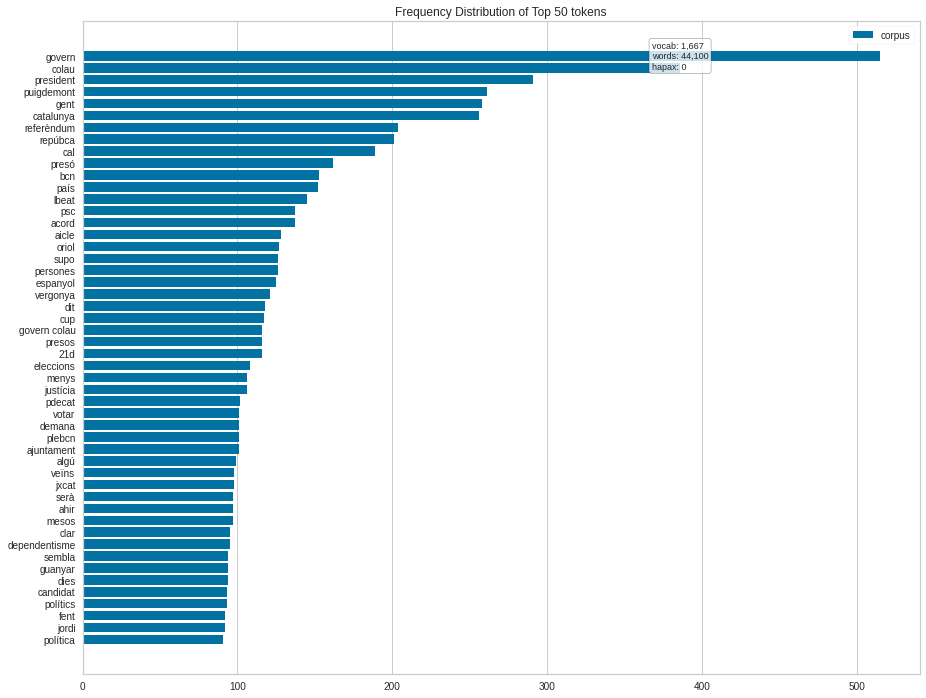

' Catalunya politic keywords extracted from troll data\nCA:\ngovern, president, repúbca, puigdemont, gent, catalunya, colau, presos, presó\n,jxcat, justicia, vergonya, referèndum, pdecat, cup, eleccions, eleccion,persones,\nfemxarxa,\nES:\ngobierno,vox,catalanes,gente,prisión,ciudadanos,dependencia, dependentista, hablemos,\nderechos,Sánchez,medios,Cataluña,psoe,pse,andalucia,1o,cárcel,derechos humanos,\nelecciones, humanos, políticos, cambio\n'

In [ ]:
from yellowbrick.text import FreqDistVisualizer, TSNEVisualizer
vect = CountVectorizer(stop_words=my_stopwords,min_df=10, ngram_range=(1,2))
docs = vect.fit_transform(cat_tweets.clean_tweet_text.dropna())
features = vect.get_feature_names()
plt.figure(figsize=(15,12))
visualiser = FreqDistVisualizer(features=features)
visualiser.fit(docs)
visualiser.poof()
plt.show()
''' Catalunya politic keywords extracted from troll data
CA:
govern, president, repúbca, puigdemont, gent, catalunya, colau, presos, presó
,jxcat, justicia, vergonya, referèndum, pdecat, cup, eleccions, eleccion,persones,
femxarxa,
ES:
gobierno,vox,catalanes,gente,prisión,ciudadanos,dependencia, dependentista, hablemos,
derechos,Sánchez,medios,Cataluña,psoe,pse,andalucia,1o,cárcel,derechos humanos,
elecciones, humanos, políticos, cambio
'''

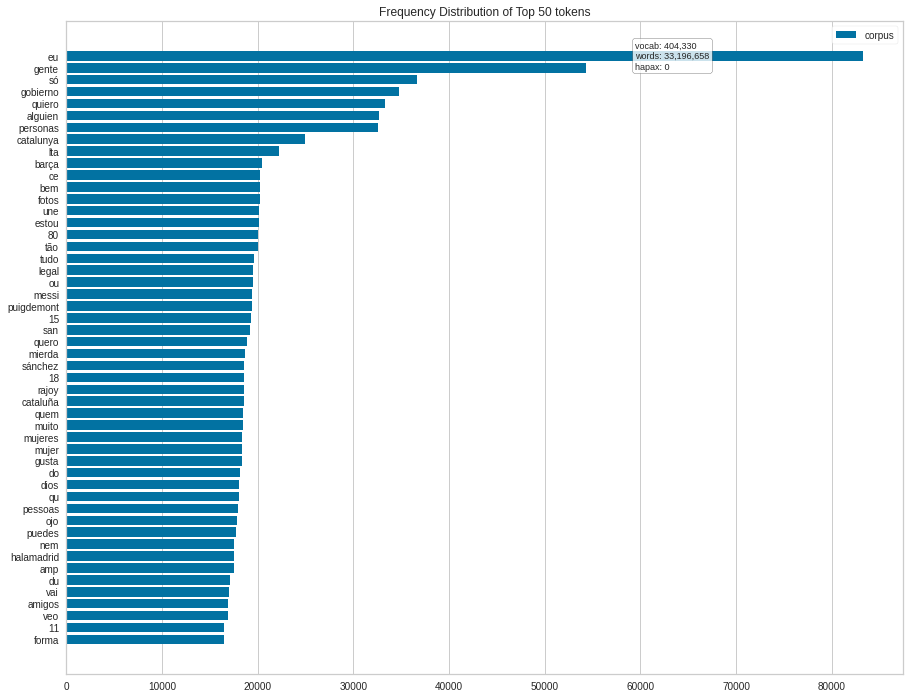

' Catalunya politic keywords extracted from random data\n\n'

In [ ]:
my_rand_stopwords = ['não','vida','madrid','via','vía','uma','mais','mundo','casa',\
                     'fez','est','mañana','sō','año','semana','já','2018','quiero'\
                     'alguien','real','gol','historia','país','mha','ter','amor',\
                     'noche','puta','madre','grande','20','equipo','vor','tenho',
                     'quando','foto','ita','twier','mesmo','30','cara','vou','pasa',\
                     'pour','visto']
my_stopwords = set(list(my_stopwords)+my_rand_stopwords)
from yellowbrick.text import FreqDistVisualizer, TSNEVisualizer
vect = CountVectorizer(stop_words=my_stopwords,min_df=10, ngram_range=(1,2))
docs = vect.fit_transform(es_tweets.clean_tweet_text.dropna())
features = vect.get_feature_names()
plt.figure(figsize=(15,12))
visualiser = FreqDistVisualizer(features=features)
visualiser.fit(docs)
visualiser.poof()
plt.show()
''' Catalunya politic keywords extracted from random data

'''

# Are the trolls bots?

## Repeatitive tweets

In [ ]:
cat_tweets.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_userid',
       'in_reply_to_tweetid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices', 'is_com_or_rt', 'abbr_count',
       'tweet_len', 'stopwords_count', 'hashtag_count', 'mention_count',
       'caps_to_normal', 'Date', 'Time', 'mensh', 'mensh_user_desc',
       'num_in_name', 'Acc_age', 'follower_to_following', 'clean_tweet_text',
       'clean_user_profile_description'],
      dtype='object')

In [ ]:
(cat_tweets.clean_tweet_text.value_counts()/cat_tweets.clean_tweet_text.value_counts().sum()).mean() 
#this shows that the tweets are not repeatative

0.00013726835964310123

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

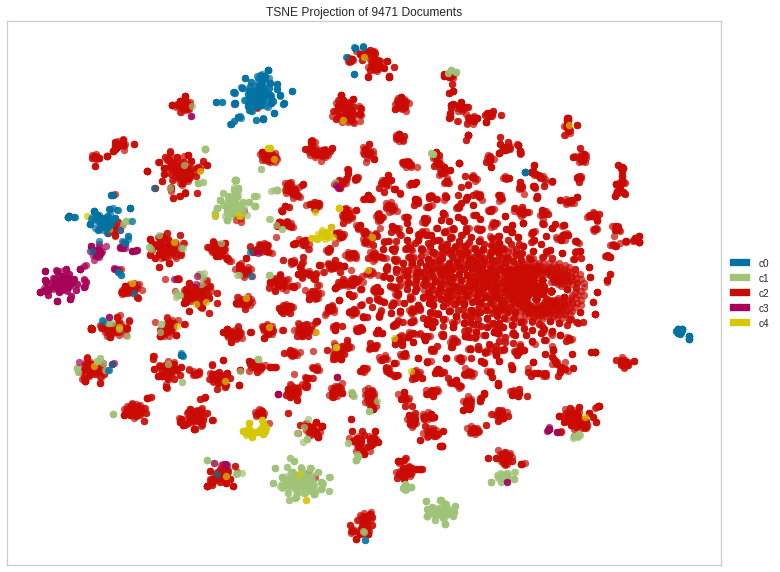

In [ ]:
from yellowbrick.text import TSNEVisualizer
from sklearn.cluster import KMeans
CLS_NUM = 5
corpus = list(cat_tweets.clean_tweet_text.dropna().values)
tfidf = TfidfVectorizer(stop_words=my_stopwords, min_df=10, ngram_range=(1,2))
docs = tfidf.fit_transform(corpus)
# Let's see if the topic clusters are distinct enough for 10
clusters = KMeans(n_clusters=CLS_NUM)
clusters.fit(docs)
# This takes a while to re-run
plt.figure(figsize=(16,10))
tsne = TSNEVisualizer()
tsne.fit(docs, ["c{}".format(c) for c in clusters.labels_])
tsne.poof()
plt.show()

## Tweet time and time interval distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


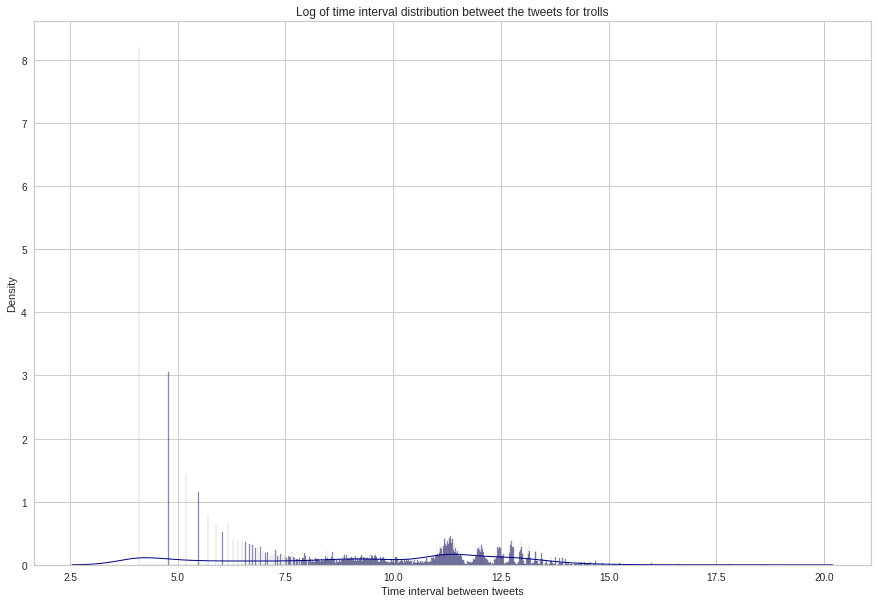

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
diff_time = []
for user in cat_tweets.userid.value_counts().index:
  temp_df = cat_tweets.tweet_time[cat_tweets.userid==user].dropna().sort_values()

  for i in range(1,len(temp_df)):
    diff_time.append((datetime.strptime(temp_df.iloc[i], '%Y-%m-%d %H:%M:%S')-datetime.strptime(temp_df.iloc[i-1], '%Y-%m-%d %H:%M:%S')).total_seconds())

plt.figure(figsize=(15,10))
# Density Plot and Histogram of all arrival delays
sns.distplot(np.log(pd.Series(diff_time)[pd.Series(diff_time)>0]), hist=True, kde=True, 
             bins=1000, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
plt.title('Log of time interval distribution betweet the tweets for trolls')
plt.xlabel('Time interval between tweets')
plt.show()


if the trolls were robot, they wouldn't have a distribution with high dispersion. Be aware that we used log to reduce dispersion to be able to visualize the time intervals. 

# Making Samples for EDA

In [ ]:
keywords = ['govern', 'president', 'repúbca', 'puigdemont', 'gent', 'catalunya',\
            'colau', 'presos', 'presó','jxcat', 'justicia', 'vergonya', 'referèndum',\
            'pdecat', 'cup', 'eleccions', 'eleccion','persones','femxarxa','gobierno',\
            'vox','catalanes','gente','prisión','ciudadanos','dependencia','dependentista',\
            'hablemos','derechos','Sánchez','medios','Cataluña','psoe','pse',\
            'andalucia','1o','cárcel','derechos humanos','elecciones', 'humanos',\
            'políticos', 'cambio']
keyhashtags = all_hashtags


def is_sample_hash(data, keys=keyhashtags):
  for hash in keys:
    if hash in data:
      return 1
  return 0


def is_sample_key(data, keys=keywords):
  for key in keys:
    if key in data:
      return 1
  return 0

es_tweets['is_sample_hash'] = es_tweets.clean_tweet_text.dropna().apply(is_sample_key)
es_tweets['is_sample_key'] = es_tweets.hashtags.dropna().apply(is_sample_hash)

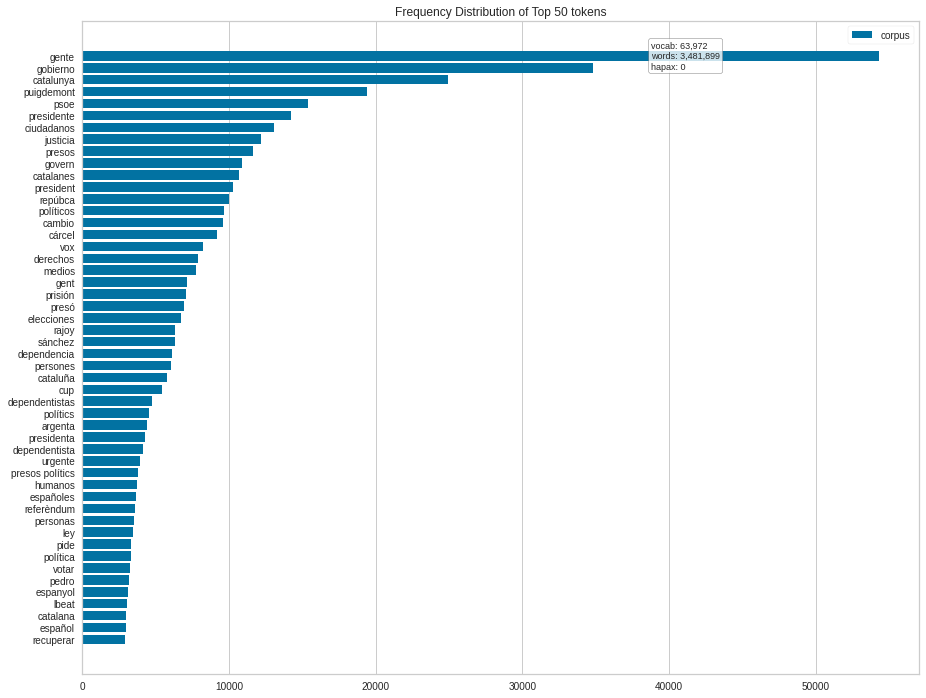

In [ ]:
vect = CountVectorizer(stop_words=my_stopwords,min_df=10, ngram_range=(1,2))
docs = vect.fit_transform(es_tweets.clean_tweet_text.dropna()[es_tweets.is_sample_hash==1])
features = vect.get_feature_names()
plt.figure(figsize=(15,12))
visualiser = FreqDistVisualizer(features=features)
visualiser.fit(docs)
visualiser.poof()
plt.show()

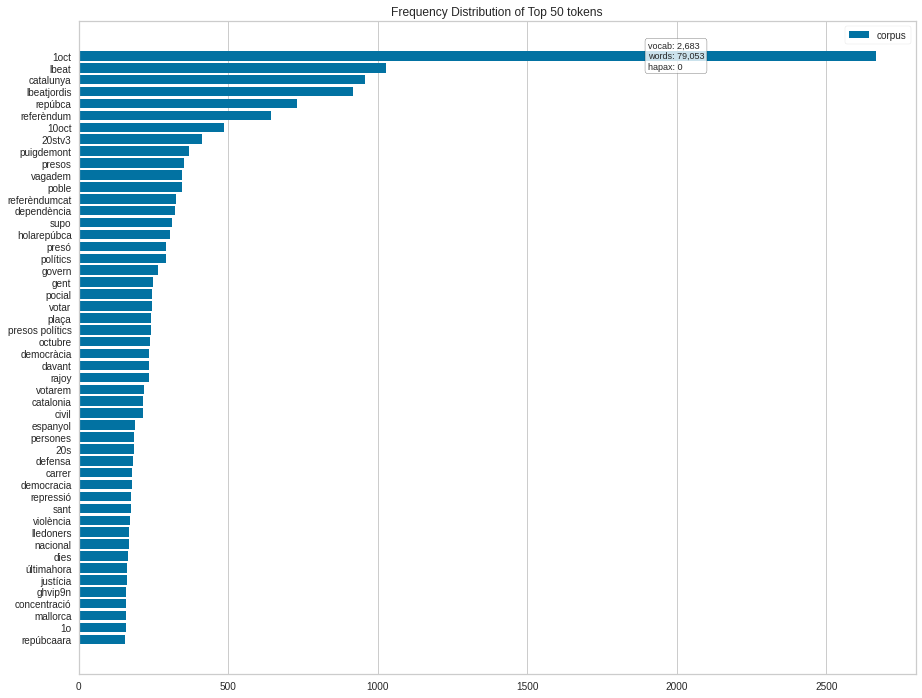

In [ ]:
vect = CountVectorizer(stop_words=my_stopwords,min_df=10, ngram_range=(1,2))
docs = vect.fit_transform(es_tweets.clean_tweet_text.dropna()[es_tweets.is_sample_key==1])
features = vect.get_feature_names()
plt.figure(figsize=(15,12))
visualiser = FreqDistVisualizer(features=features)
visualiser.fit(docs)
visualiser.poof()
plt.show()
    

Sampling using hashtags gives us larger sample with better frequent tokens related to politics in catalunya.

In [ ]:
es_tweets = es_tweets[es_tweets.is_sample_hash==1]

In [ ]:
save_df(es_tweets, 'random_sample')
save_df(cat_tweets, 'troll_sample')

# Account Statistics Compared

## Date and Time

In [ ]:
def diff_plot_bar(df_troll,df_random, title_, xlabel_, format_='%Y-%m', rotation_=ROTATION, figsize_=FIGSIZE, ylabel_=YLABEL, opacity_=OPACITY):

  result_date_freq = diff_df_freq(df_troll,df_random)

  plt.figure(figsize=figsize_)
  plt.bar(pd.to_datetime(result_date_freq.index, format=format_), result_date_freq.iloc[:,0], alpha= opacity_, label='Random Tweets')
  plt.bar(pd.to_datetime(result_date_freq.index, format=format_), result_date_freq.iloc[:,1], alpha= opacity_, label='Troll Tweets')
  plt.legend(loc=0, fontsize=18)
  #plt.xticks([]) #just uncomment for time
  plt.xticks(rotation=rotation_)
  plt.xlabel(xlabel_)
  plt.ylabel(ylabel_)
  plt.title(title_)
  plt.show()

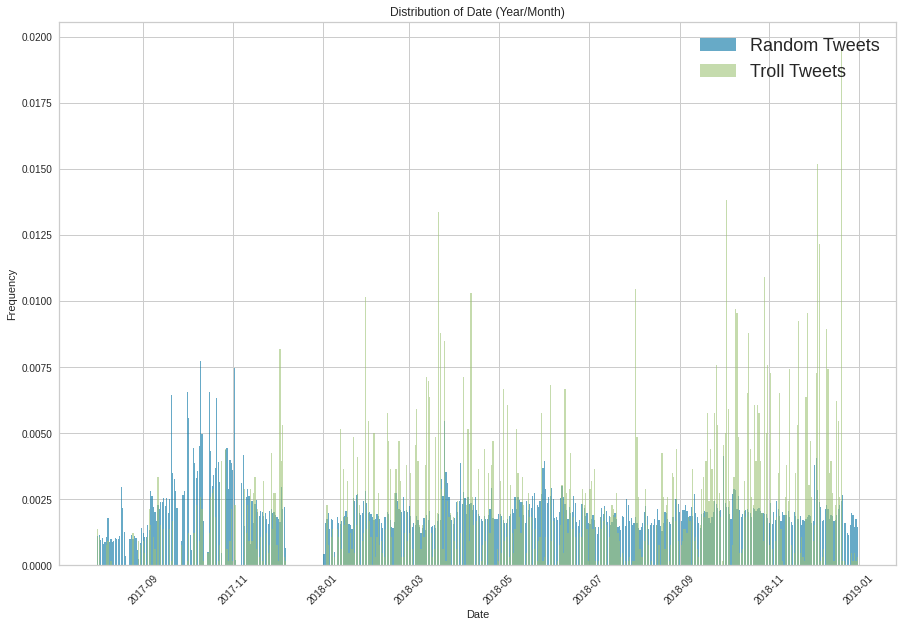

In [ ]:
troll_date = pd.DataFrame(cat_tweets.Date.value_counts().sort_index())
random_date = pd.DataFrame(es_tweets.Date.value_counts().sort_index())
diff_plot_bar(troll_date, random_date, title_='Distribution of Date (Year/Month)', xlabel_ = 'Date')
del troll_date
del random_date

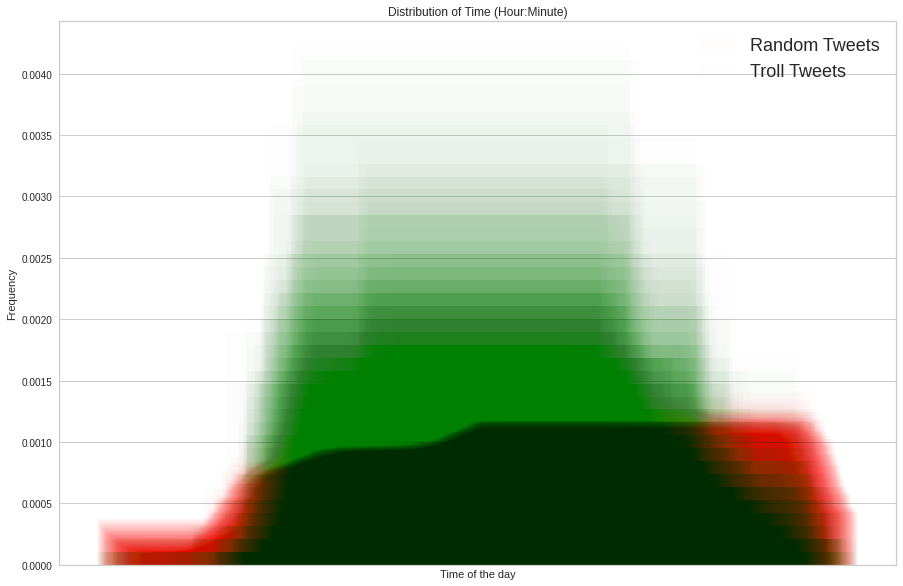

In [ ]:
troll_time = pd.DataFrame(cat_tweets.Time.value_counts().sort_index())
random_time = pd.DataFrame(es_tweets.Time.value_counts().sort_index())
diff_plot_bar(troll_time, random_time, title_='Distribution of Time (Hour:Minute)', xlabel_ = 'Time of the day', format_='%H:%M', opacity_=0.01)
del troll_time
del random_time

In [ ]:
def parse_time2(df, col_name):
  df[col_name] = pd.to_datetime(df[col_name], format='%Y %m %d %H:%M')
  df['Date2'] = df[col_name].dt.strftime('%Y %m')
  df['Time2'] = df[col_name].dt.strftime('%H')
  
  return df

In [ ]:
cat_tweets = parse_time2(cat_tweets, 'tweet_time')
es_tweets = parse_time2(es_tweets, 'tweet_time')

In [ ]:
def diff_plot_bar2(df_troll,df_random, title_, xlabel_, rotation_=ROTATION, figsize_=FIGSIZE, ylabel_=YLABEL, opacity_=OPACITY):

  result_date_freq = diff_df_freq(df_troll,df_random)

  plt.figure(figsize=figsize_)
  plt.bar(result_date_freq.index, result_date_freq.iloc[:,0], alpha= opacity_, label='Random Tweets', color='orange')
  plt.bar(result_date_freq.index, result_date_freq.iloc[:,1], alpha= opacity_, label='Troll Tweets', color='blue')
  plt.legend(loc=0, fontsize=18)
  plt.xticks(rotation=rotation_)
  plt.xlabel(xlabel_)
  plt.ylabel(ylabel_)
  plt.title(title_)
  plt.show()

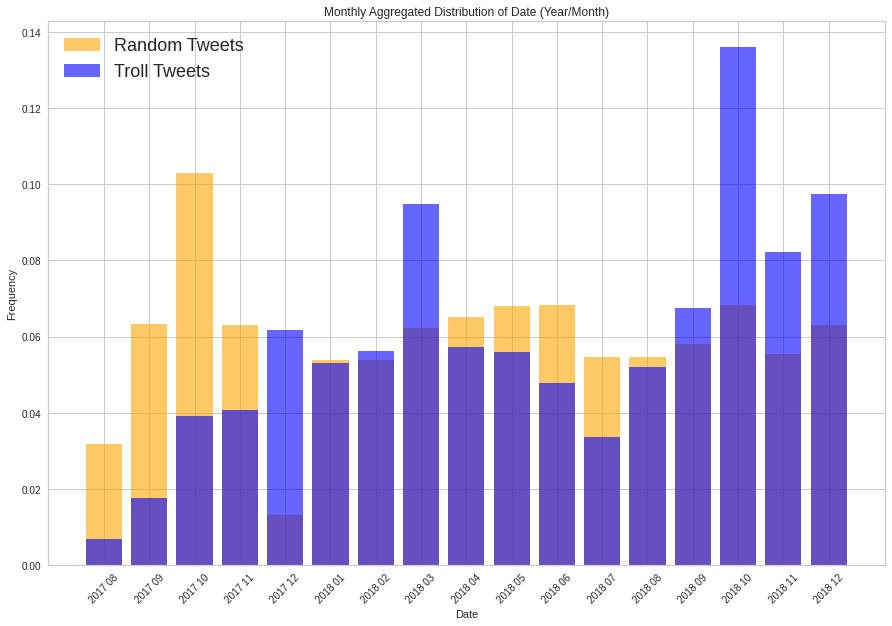

In [ ]:
troll_date = pd.DataFrame(cat_tweets.Date2.value_counts().sort_index())
random_date = pd.DataFrame(es_tweets.Date2.value_counts().sort_index())
diff_plot_bar2(troll_date, random_date, title_='Monthly Aggregated Distribution of Date (Year/Month)', xlabel_ = 'Date')
del troll_date
del random_date

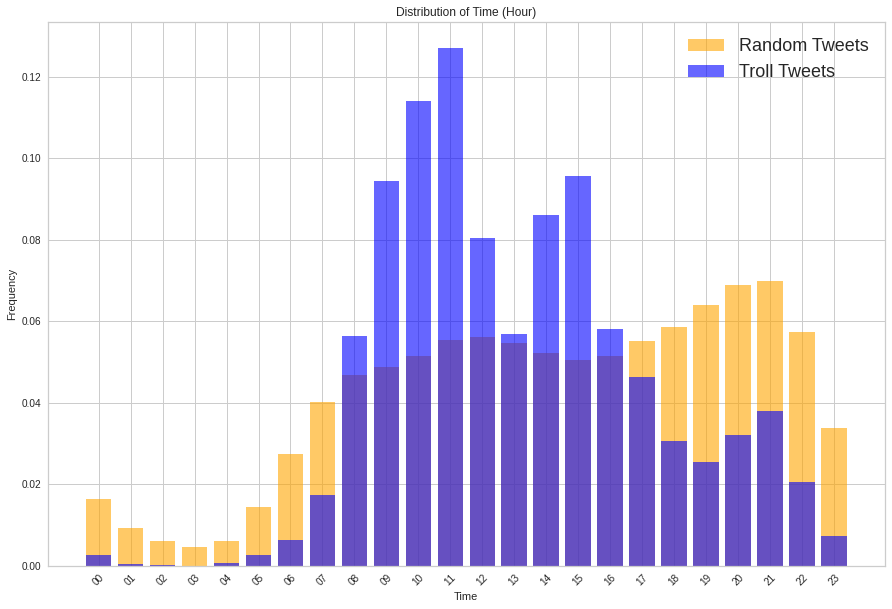

In [ ]:
troll_time = pd.DataFrame(cat_tweets.Time2.value_counts().sort_index())
random_time = pd.DataFrame(es_tweets.Time2.value_counts().sort_index())
diff_plot_bar2(troll_time, random_time, title_='Distribution of Time (Hour)', xlabel_ = 'Time',)
del troll_time
del random_time

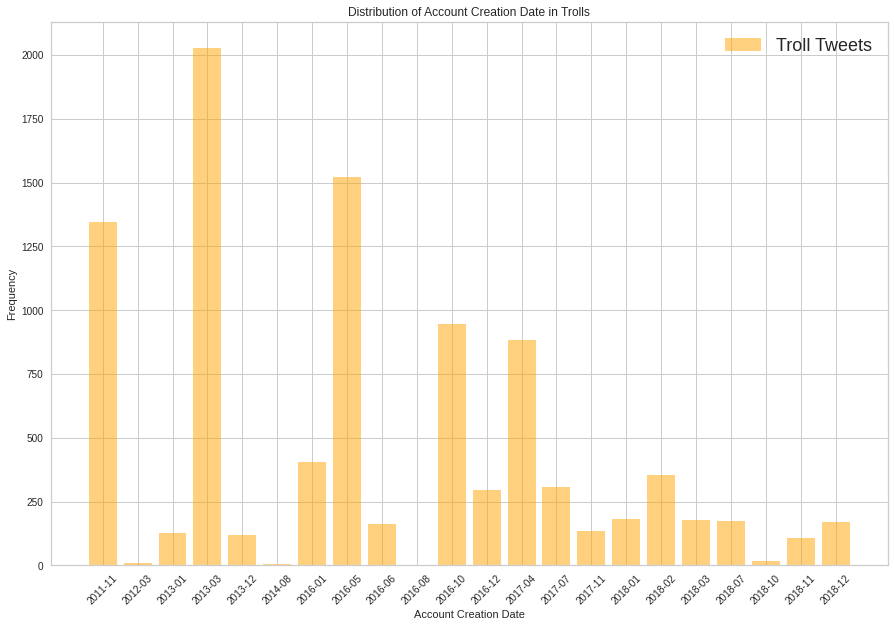

In [ ]:
troll_creation_date = pd.DataFrame(pd.to_datetime(cat_tweets.account_creation_date, format='%Y-%m-%d').dt.strftime('%Y-%m').value_counts().sort_index())
plt.figure(figsize=(15,10))
plt.bar(troll_creation_date.index, troll_creation_date.iloc[:,0], alpha= 0.5, label='Troll Tweets', color='orange')
plt.legend(loc=0, fontsize=18)
plt.xticks(rotation=45)
plt.xlabel('Account Creation Date')
plt.ylabel('Frequency')
plt.title('Distribution of Account Creation Date in Trolls')
plt.show()
#del troll_creation_date

## Num. in name, Folower/Following, Acc Age

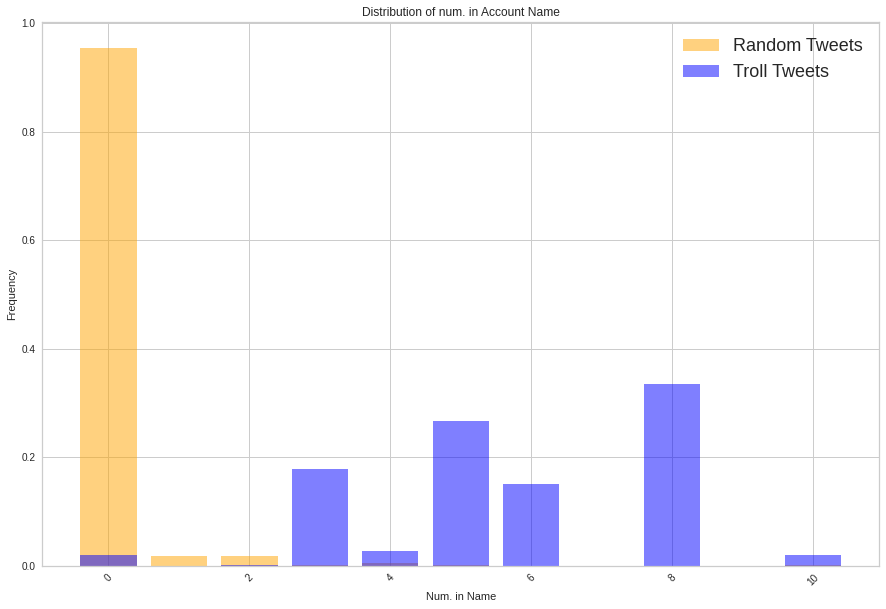

In [ ]:
troll_nin = pd.DataFrame(cat_tweets.num_in_name.value_counts().sort_index())
random_nin = pd.DataFrame(es_tweets.num_in_name.value_counts().sort_index())
result_date_freq = diff_df_freq(troll_nin,random_nin)
plt.figure(figsize=(15,10))
plt.bar(result_date_freq.index, result_date_freq.iloc[:,0], alpha= 0.5, label='Random Tweets', color='orange')
plt.bar(result_date_freq.index, result_date_freq.iloc[:,1], alpha= 0.5, label='Troll Tweets', color='blue')
plt.legend(loc=0, fontsize=18)
plt.xticks(rotation=45)
plt.xlabel('Num. in Name')
plt.ylabel('Frequency')
plt.title('Distribution of num. in Account Name')
plt.show()
del troll_nin
del random_nin

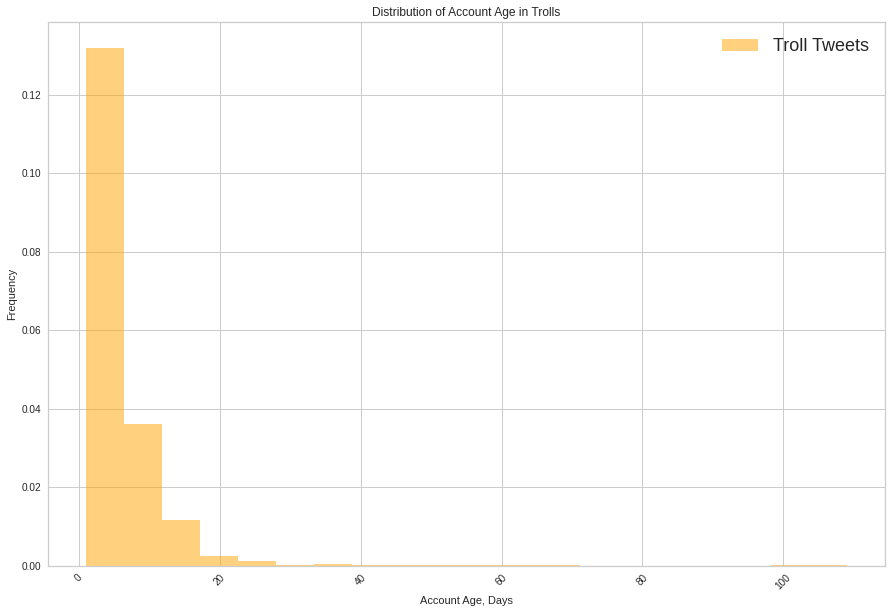

In [ ]:
troll_age = pd.DataFrame(cat_tweets.Acc_age.value_counts().sort_index())
plt.figure(figsize=(15,10))
plt.hist(troll_age.iloc[:,0], alpha= 0.5, label='Troll Tweets', color='orange', bins=20,density=True)
plt.legend(loc=0, fontsize=18)
plt.xticks(rotation=45)
plt.xlabel('Account Age, Days')
plt.ylabel('Frequency')
plt.title('Distribution of Account Age in Trolls')
plt.show()
del troll_age


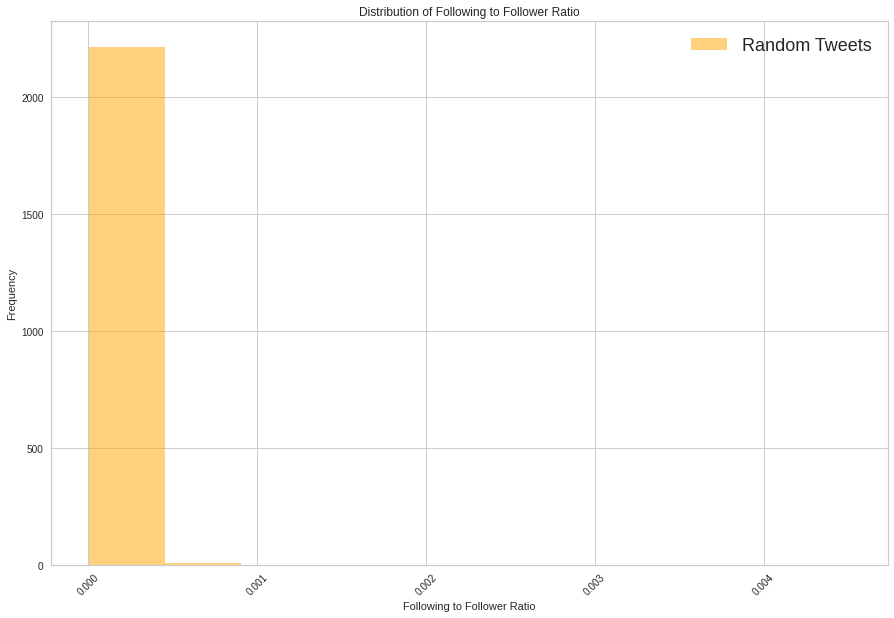

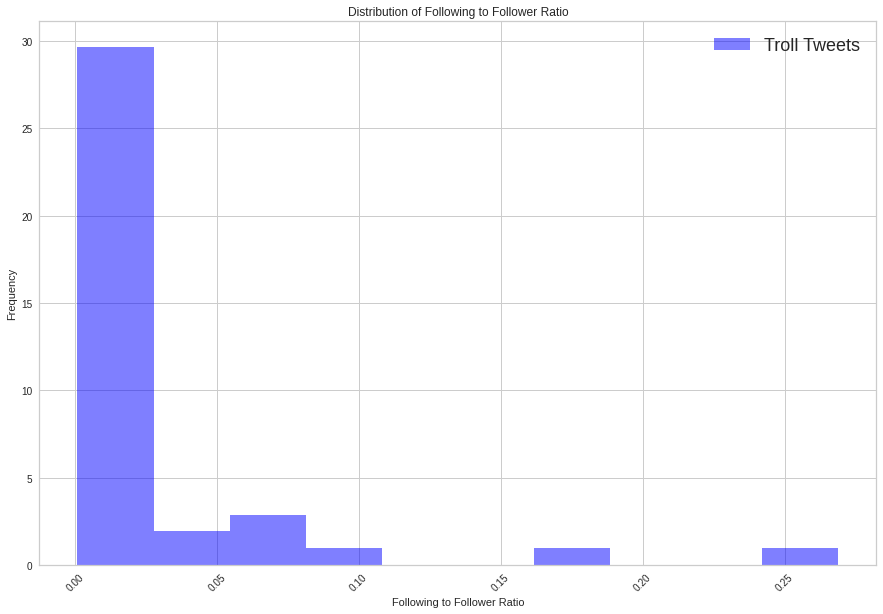

In [ ]:
troll_ff = pd.DataFrame(cat_tweets.follower_to_following.value_counts().sort_index())
random_ff = pd.DataFrame(es_tweets.follower_to_following.value_counts().sort_index())
result_date_freq = diff_df_freq(troll_ff,random_ff)
plt.figure(figsize=(15,10))
plt.hist( result_date_freq.iloc[:,0], alpha= 0.5, label='Random Tweets', color='orange', bins=10,density=True)
plt.legend(loc=0, fontsize=18)
plt.xticks(rotation=45)
plt.xlabel('Following to Follower Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Following to Follower Ratio')
plt.show()

plt.figure(figsize=(15,10))
plt.hist(result_date_freq.iloc[:,1], alpha= 0.5, label='Troll Tweets', color='blue', bins=10,density=True)
plt.legend(loc=0, fontsize=18)
plt.xticks(rotation=45)
plt.xlabel('Following to Follower Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Following to Follower Ratio')
plt.show()

del troll_ff
del random_ff

#FIX FREQUENCY HERE

In [ ]:
#user_reported_location
'''
troll_loc = pd.DataFrame(cat_tweets.user_reported_location.value_counts().sort_values())
random_loc = pd.DataFrame(es_tweets.user_reported_location.value_counts().sort_values())
result_date_freq = diff_df_freq(troll_loc,random_loc)
plt.figure(figsize=(15,10))
plt.bar(result_date_freq.index[1:30], result_date_freq.iloc[1:30,0], alpha= 0.5, label='Random Tweets', color='orange')
plt.bar(result_date_freq.index[1:30], result_date_freq.iloc[1:30,1], alpha= 0.5, label='Troll Tweets', color='blue')
plt.legend(loc=0, fontsize=18)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Distribution of User reported location')
plt.show()
del troll_loc
del random_loc
'''

In [ ]:
result_date_freq.dropna() #NEEDS EXTENSIVE GROUPING

,user_reported_location_x,user_reported_location_y
"Terrassa, España",0.000130,0.004978
"Manresa, Espanya",0.000187,0.033796
"Girona, Catalunya",0.000371,0.000786
"Barcelona, Spain",0.000424,0.048729
"Barcelona, Espanya",0.001218,0.224260
"Barcelona, Cataluña",0.008015,0.105580
"Barcelona, Catalunya",0.009050,0.260676
Barcelona,0.026569,0.124181
"Barcelona, España",0.039831,0.197013


# Tweets Statistics Compared

In [ ]:
cat_tweets.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_userid',
       'in_reply_to_tweetid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices', 'is_com_or_rt', 'abbr_count',
       'tweet_len', 'stopwords_count', 'hashtag_count', 'mention_count',
       'caps_to_normal', 'Date', 'Time', 'mensh', 'mensh_user_desc',
       'num_in_name', 'Acc_age', 'follower_to_following', 'clean_tweet_text',
       'clean_user_profile_description'],
      dtype='object')

In [ ]:
cat_tweets.is_com_or_rt = [0 if i==0 or i==None else 1 for i in cat_tweets.is_com_or_rt]
es_tweets.is_com_or_rt = [0 if i==0 or i==None else 1 for i in es_tweets.is_com_or_rt]

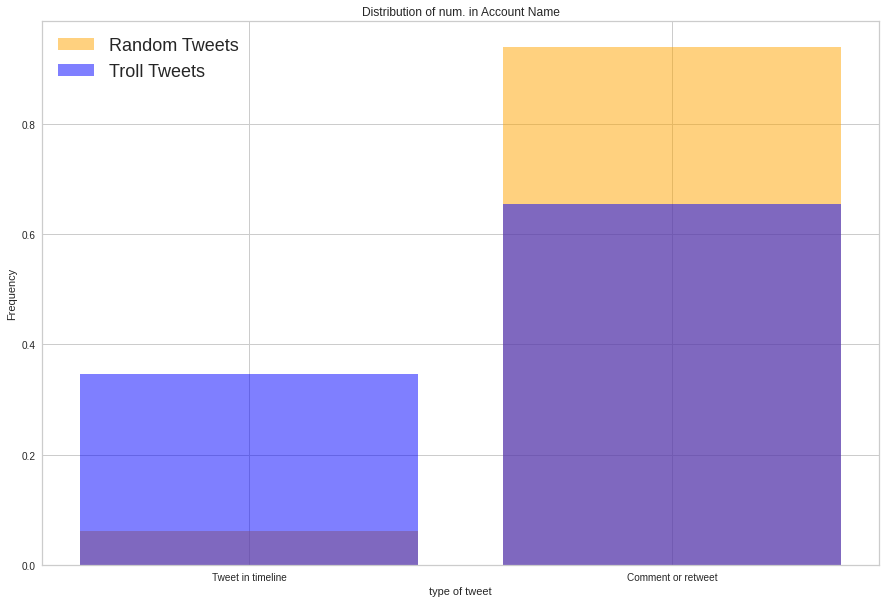

In [ ]:
#is_com_or_rt
troll_com_rt = pd.DataFrame(cat_tweets.is_com_or_rt.value_counts().sort_index())
random_com_rt = pd.DataFrame(es_tweets.is_com_or_rt.value_counts().sort_index())
LABELS = ['Tweet in timeline', 'Comment or retweet']
result_date_freq = diff_df_freq(troll_com_rt,random_com_rt)
result_date_freq.index= LABELS
plt.figure(figsize=(15,10))
plt.bar(result_date_freq.index, result_date_freq.iloc[:,0], alpha= 0.5, label='Random Tweets', color='orange')
plt.bar(result_date_freq.index, result_date_freq.iloc[:,1], alpha= 0.5, label='Troll Tweets', color='blue')
plt.legend(loc=0, fontsize=18)
plt.xticks(rotation=0)
plt.xlabel('type of tweet')
plt.ylabel('Frequency')
plt.title('Distribution of num. in Account Name')
plt.show()
del troll_com_rt
del random_com_rt

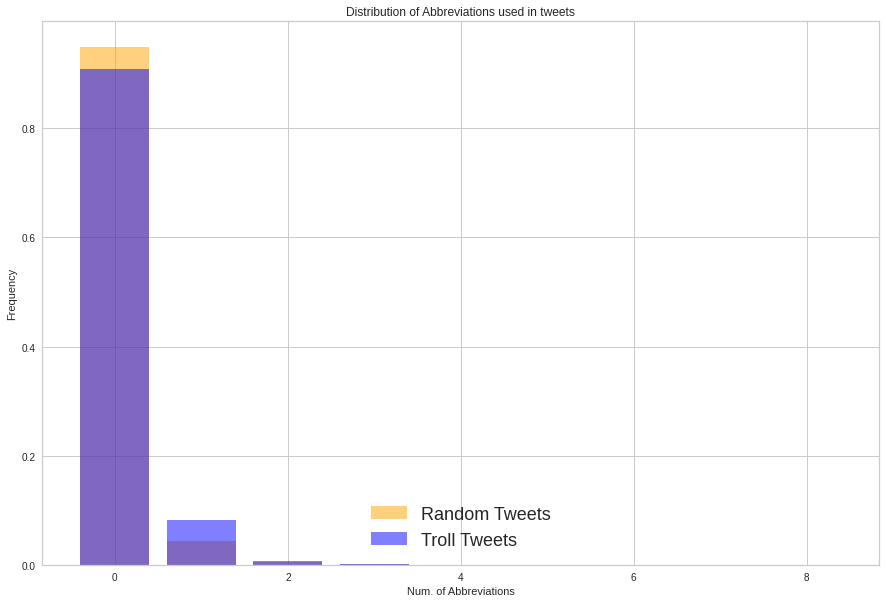

In [ ]:
#abbr_count
troll_abbr_count = pd.DataFrame(cat_tweets.abbr_count.value_counts().sort_index())
random_abbr_count = pd.DataFrame(es_tweets.abbr_count.dropna().apply(int).value_counts().sort_index())
result_date_freq = diff_df_freq(troll_abbr_count, random_abbr_count)
plt.figure(figsize=(15,10))
plt.bar(result_date_freq.index, result_date_freq.iloc[:,0], alpha= 0.5, label='Random Tweets', color='orange')
plt.bar(result_date_freq.index, result_date_freq.iloc[:,1], alpha= 0.5, label='Troll Tweets', color='blue')
plt.legend(loc=0, fontsize=18)
plt.xticks(rotation=0)
plt.xlabel('Num. of Abbreviations')
plt.ylabel('Frequency')
plt.title('Distribution of Abbreviations used in tweets')
plt.show()
del troll_abbr_count
del random_abbr_count

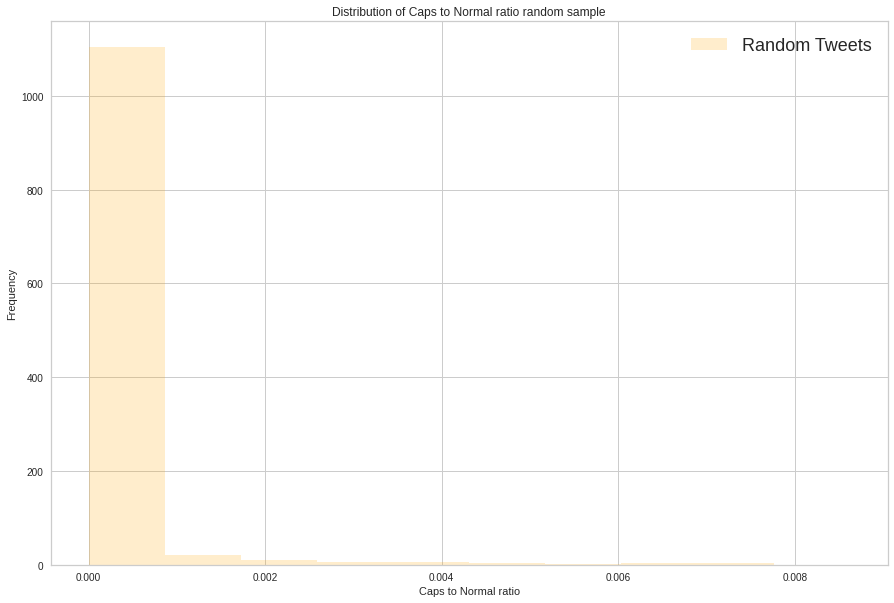

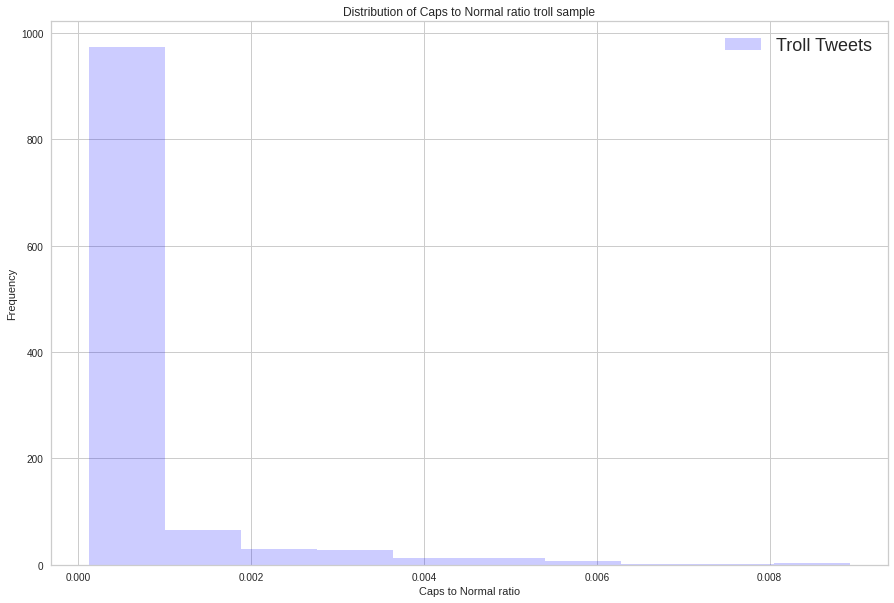

In [ ]:
#caps_to_normal
troll_caps_norm = pd.DataFrame(cat_tweets.caps_to_normal.value_counts().sort_index())
random_caps_norm = pd.DataFrame(es_tweets.caps_to_normal.value_counts().sort_index())
result_date_freq = diff_df_freq(troll_caps_norm, random_caps_norm)
plt.figure(figsize=(15,10))
plt.hist(result_date_freq.iloc[:,0], alpha= 0.2, label='Random Tweets', color='orange',density=True)
plt.legend(loc=0, fontsize=18)
plt.xticks(rotation=0)
plt.xlabel('Caps to Normal ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Caps to Normal ratio random sample')
#plt.xlim((0,2))
plt.show()
plt.figure(figsize=(15,10))
plt.hist(result_date_freq.iloc[:,1], alpha= 0.2, label='Troll Tweets', color='blue',density=True)
plt.legend(loc=0, fontsize=18)
plt.xticks(rotation=0)
plt.xlabel('Caps to Normal ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Caps to Normal ratio troll sample')
#plt.xlim((0,2))
plt.show()
del troll_caps_norm
del random_caps_norm

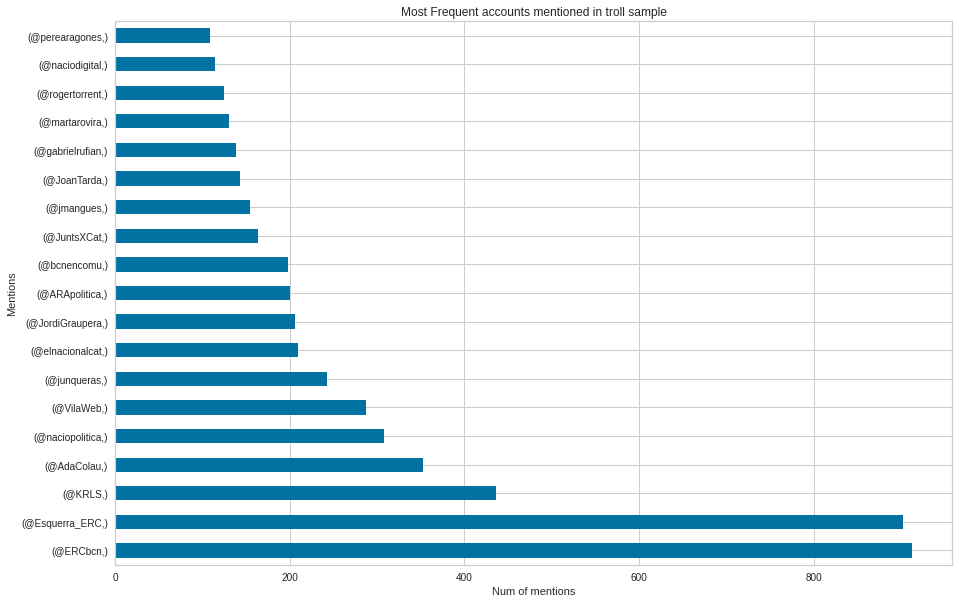

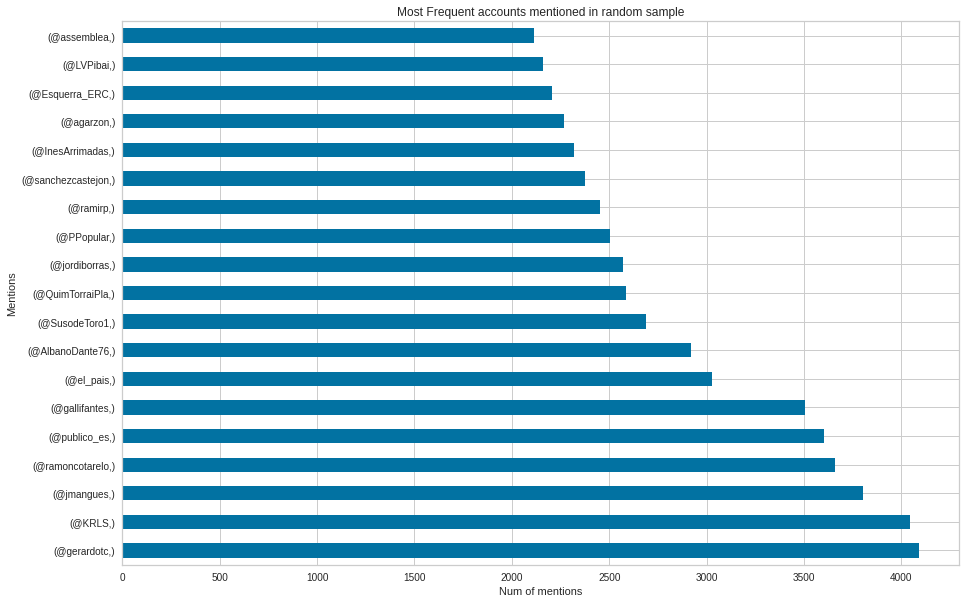

In [ ]:
#mensh
from ast import literal_eval
mensions_cat = []
for lst in cat_tweets.mensh.dropna():
    mensions_cat += literal_eval(lst)
mensions_es = []
for lst in es_tweets.mensh.dropna():
    mensions_es += literal_eval(lst)
plt.figure(figsize=(15,10))
pd.DataFrame(mensions_cat).value_counts().sort_values(ascending=False)[1:20].plot(kind='barh')
plt.title('Most Frequent accounts mentioned in troll sample')
plt.xlabel('Num of mentions')
plt.ylabel('Mentions')
plt.show()

plt.figure(figsize=(15,10))
pd.DataFrame(mensions_es).value_counts().sort_values(ascending=False)[1:20].plot(kind='barh')
plt.title('Most Frequent accounts mentioned in random sample')
plt.xlabel('Num of mentions')
plt.ylabel('Mentions')
plt.show()

In [ ]:
#mensh_user_desc   #Not much info
'''
from ast import literal_eval
mensions_cat = []
for lst in cat_tweets.mensh_user_desc.dropna():
    mensions_cat += literal_eval(lst)
mensions_es = []
for lst in es_tweets.mensh_user_desc.dropna():
    mensions_es += literal_eval(lst)
plt.figure(figsize=(15,10))
pd.DataFrame(mensions_cat).value_counts().sort_values(ascending=False)[1:20].plot(kind='barh')
plt.title('Most Frequent accounts mentioned in troll sample')
plt.xlabel('Num of mentions')
plt.ylabel('Mentions')
plt.show()

plt.figure(figsize=(15,10))
pd.DataFrame(mensions_es).value_counts().sort_values(ascending=False)[1:20].plot(kind='barh')
plt.title('Most Frequent accounts mentioned in random sample')
plt.xlabel('Num of mentions')
plt.ylabel('Mentions')
plt.show()
'''

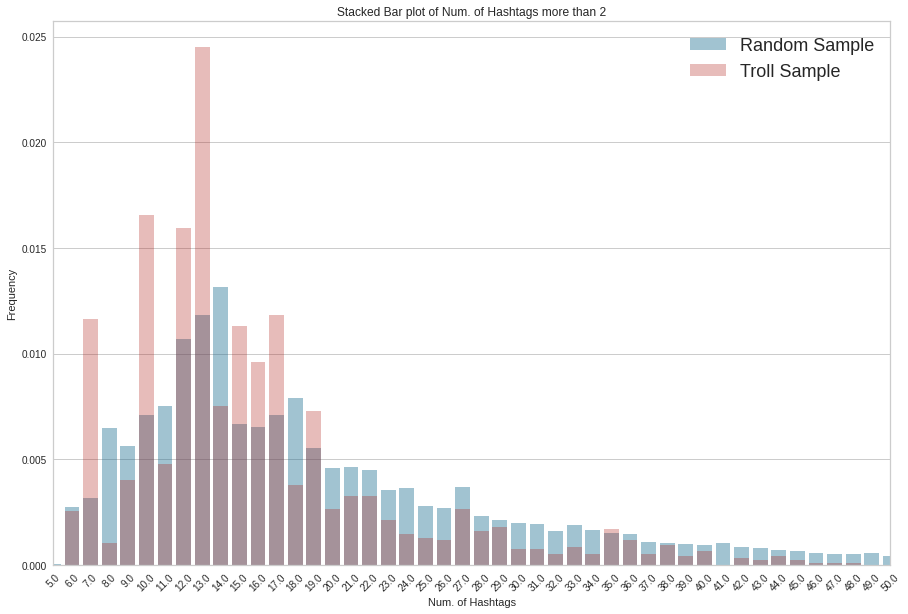

In [ ]:
#hashtag count
troll_hash_count = pd.DataFrame(cat_tweets.hashtag_count.value_counts().sort_index())
random_hash_count = pd.DataFrame(es_tweets.hashtag_count.dropna().value_counts().sort_index())
result_date_freq = diff_df_freq(troll_hash_count, random_hash_count)

# creating subplots
ax = plt.subplots(figsize=(15,10))
  
# plotting columns
ax = sns.barplot(x=result_date_freq.index[1:], y=result_date_freq.iloc[1:,0], color='b', label='Random Sample', alpha=0.4)
ax = sns.barplot(x=result_date_freq.index[1:], y=result_date_freq.iloc[1:,1], color='r', label='Troll Sample', alpha=0.3)
plt.legend(loc='upper right', fontsize=18)
plt.xticks(rotation=45)
plt.xlabel('Num. of Hashtags')
plt.ylabel('Frequency')
plt.title('Stacked Bar plot of Num. of Hashtags more than 2')
plt.xlim((0,45))
# renaming the axes
  
# visulaizing illustration
plt.show()

del troll_hash_count
del random_hash_count

Around 80% of num of hashtags are = 2

Random sample has more extreme values which may be the result of being a large sample compared to troll sample.

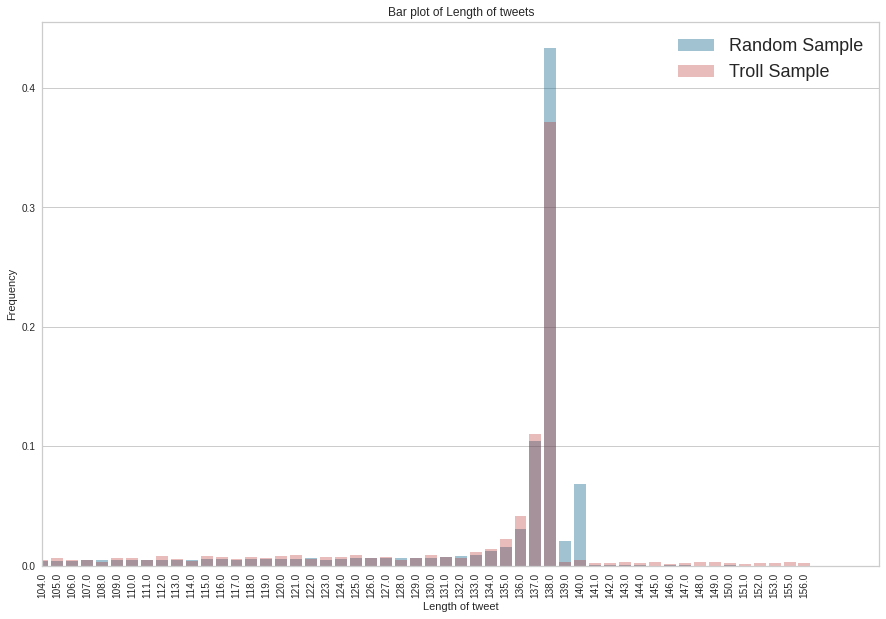

In [ ]:
# tweet_len biased by abnormal text
troll_tweet_len = pd.DataFrame(cat_tweets.tweet_len.dropna().value_counts().sort_index())
random_tweet_len = pd.DataFrame(es_tweets.tweet_len.dropna().value_counts().sort_index())
result_date_freq = diff_df_freq(troll_tweet_len, random_tweet_len)

# creating subplots
ax = plt.subplots(figsize=(15,10))
  
# plotting columns
ax = sns.barplot(x=result_date_freq.index, y=result_date_freq.iloc[:,0], color='b', label='Random Sample', alpha=0.4)
ax = sns.barplot(x=result_date_freq.index, y=result_date_freq.iloc[:,1], color='r', label='Troll Sample', alpha=0.3)
plt.legend(loc='upper right', fontsize=18)
plt.xticks(rotation=90)
plt.xlabel('Length of tweet')
plt.ylabel('Frequency')
plt.title('Bar plot of Length of tweets')
plt.xlim((100,156))
# renaming the axes
  
# visulaizing illustration
plt.show()

del troll_tweet_len
del random_tweet_len

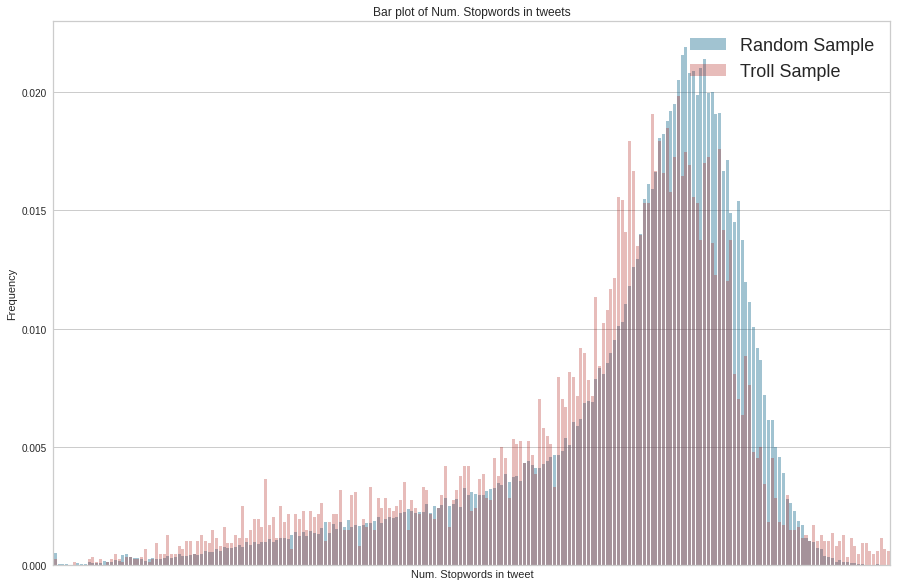

In [ ]:
#stopwords_count
troll_stopwords_count = pd.DataFrame(cat_tweets.stopwords_count.dropna().value_counts().sort_index())
random_stopwords_count = pd.DataFrame(es_tweets.stopwords_count.dropna().value_counts().sort_index())
result_date_freq = diff_df_freq(troll_stopwords_count, random_stopwords_count)

# creating subplots
ax = plt.subplots(figsize=(15,10))
  
# plotting columns
ax = sns.barplot(x=result_date_freq.index, y=result_date_freq.iloc[:,0], color='b', label='Random Sample', alpha=0.4)
ax = sns.barplot(x=result_date_freq.index, y=result_date_freq.iloc[:,1], color='r', label='Troll Sample', alpha=0.3)
plt.legend(loc='upper right', fontsize=18)
plt.xticks([])
plt.xlabel('Num. Stopwords in tweet')
plt.ylabel('Frequency')
plt.title('Bar plot of Num. Stopwords in tweets')
#plt.xlim((100,156))
# renaming the axes
  
# visulaizing illustration
plt.show()

del troll_stopwords_count
del random_stopwords_count

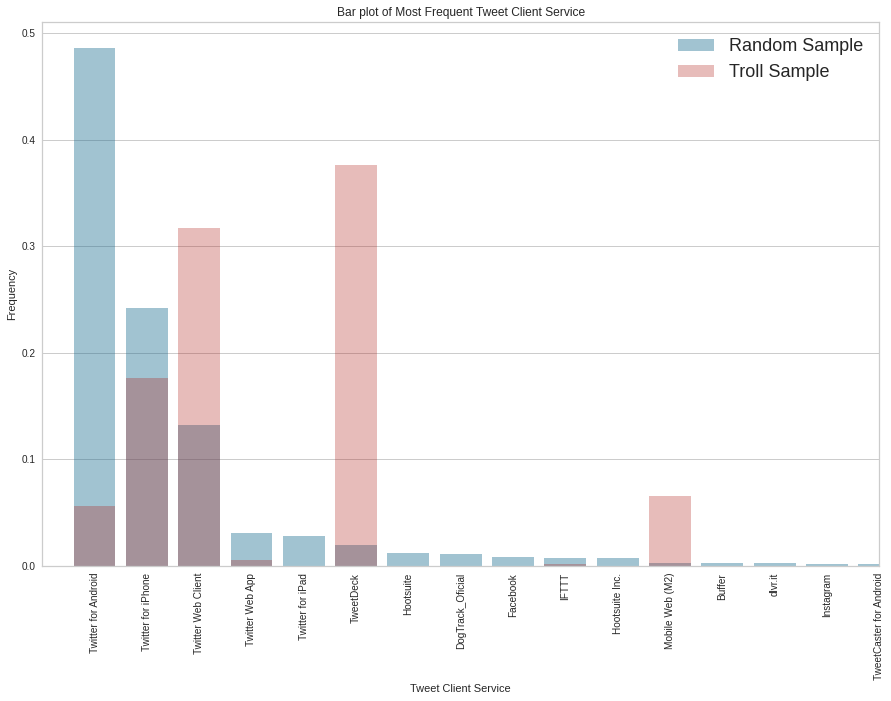

In [ ]:
#device
troll_tweet_client_name = pd.DataFrame(cat_tweets.tweet_client_name.dropna().value_counts().sort_values(ascending=False))
random_tweet_client_name = pd.DataFrame(es_tweets.tweet_client_name.dropna().value_counts().sort_values(ascending=False))
result_date_freq = diff_df_freq(troll_tweet_client_name, random_tweet_client_name)

# creating subplots
ax = plt.subplots(figsize=(15,10))
  
# plotting columns
ax = sns.barplot(x=result_date_freq.index, y=result_date_freq.iloc[:,0], color='b', label='Random Sample', alpha=0.4)
ax = sns.barplot(x=result_date_freq.index, y=result_date_freq.iloc[:,1], color='r', label='Troll Sample', alpha=0.3)
plt.legend(loc='upper right', fontsize=18)
plt.xticks(rotation=90)
plt.xlabel('Tweet Client Service')
plt.ylabel('Frequency')
plt.title('Bar plot of Most Frequent Tweet Client Service')
plt.xlim((-1,15))
# renaming the axes
  
# visulaizing illustration
plt.show()

del troll_tweet_client_name
del random_tweet_client_name

# Sample Construction

In [ ]:
troll_sample = pd.read_csv('./Text Mining Project/DATA/troll_sample.csv') # Dataset was for 2017-2019
random_sample = pd.read_csv('./Text Mining Project/DATA/random_sample.csv') # Dataset was for 2019

In [ ]:
print(f"troll_sample shape = {troll_sample.shape}, random_sample shape={random_sample.shape}")

troll_sample shape = (9489, 47), random_sample shape=(389734, 36)


As you see we are facing with imbalance. Smooth method seems like a good way to take care of it.

In [ ]:
# Setting y for supervised models.
troll_sample['is_troll'] = np.ones(troll_sample.shape[0])
random_sample['is_troll'] = np.zeros(random_sample.shape[0])

In [ ]:
from langdetect import detect
def detect_lang(data): #Using this only for lang = None
  try:
    return detect(data)
  except:
    return None 

In [ ]:
troll_sample['lang'] = troll_sample.clean_tweet_text.apply(detect_lang)
random_sample['lang'] = random_sample.clean_tweet_text.apply(detect_lang)

In [ ]:
# Make the text sample
cols_t = ['clean_tweet_text', 'is_troll', 'lang']
t_sample = pd.concat([troll_sample[cols_t],random_sample[cols_t]])
t_sample = t_sample.reset_index(drop=True)
save_df(t_sample, 'text_sample')

In [ ]:
for i in troll_sample.columns:
  if i in random_sample.columns:
    print(i)

tweetid
userid
user_display_name
user_screen_name
user_reported_location
user_profile_description
follower_count
following_count
tweet_text
tweet_time
tweet_client_name
in_reply_to_userid
in_reply_to_tweetid
quoted_tweet_tweetid
like_count
retweet_count
hashtags
urls
user_mentions
is_com_or_rt
abbr_count
tweet_len
stopwords_count
hashtag_count
mention_count
caps_to_normal
Date
Time
mensh
mensh_user_desc
num_in_name
follower_to_following
clean_tweet_text
clean_user_profile_description
is_troll
lang


In [ ]:
# Make the Account-Specific Sample
cols_a = ['follower_count','following_count','tweet_client_name','like_count',\
        'retweet_count', 'is_troll','is_com_or_rt','num_in_name',\
        'follower_to_following','Time','Date','is_troll']
a_sample = pd.concat([troll_sample[cols_a],random_sample[cols_a]])
a_sample = a_sample.reset_index(drop=True)
save_df(a_sample, 'a_sample')

In [ ]:
# Make the Text-Specific Sample
cols_ts = ['tweet_len','abbr_count','stopwords_count','hashtag_count','mention_count',\
           'caps_to_normal','lang','is_troll']
ts_sample = pd.concat([troll_sample[cols_ts],random_sample[cols_ts]])
ts_sample = ts_sample.reset_index(drop=True)
save_df(ts_sample, 'ts_sample')

In [ ]:
# Make the Account/Text-Specific Sample
cols_at = ['tweet_len','abbr_count','stopwords_count','hashtag_count','mention_count',\
           'caps_to_normal','lang','follower_count','following_count',\
           'tweet_client_name','like_count','retweet_count', 'is_troll',\
           'is_com_or_rt','num_in_name','follower_to_following','Time','Date',\
           'is_troll']
at_sample = pd.concat([troll_sample[cols_at],random_sample[cols_at]])
at_sample = at_sample.reset_index(drop=True)
save_df(at_sample, 'at_sample')

In [ ]:
# Make the Ultimate Sample
ult_cols = ['follower_count','following_count','tweet_client_name','like_count',\
            'retweet_count','is_com_or_rt','num_in_name',\
            'follower_to_following','Time','Date','tweet_len','abbr_count',\
            'stopwords_count','hashtag_count','mention_count',\
            'caps_to_normal','clean_tweet_text', 'is_troll', 'lang']
ult_sample = pd.concat([troll_sample[ult_cols],random_sample[ult_cols]])
ult_sample = ult_sample.reset_index(drop=True)
save_df(ult_sample, 'ult_sample')

# main functions in models

In [ ]:
from re import sub
from sklearn.metrics import accuracy_score
def preprocess(doc, t = 'string'):
  from nltk.stem.snowball import SnowballStemmer
  stemmer = SnowballStemmer('spanish')
  #Stop word for Eng by Alireza

  if t == 'list':
    for i in range(len(doc)):
      doc[i] = sub('[^\w|\s]', '',doc[i])
      doc[i] = sub('\s+', ' ',doc[i])
      doc[i] = doc[i].casefold()
      for j in range(len(doc[i].split(' '))):
        doc[i] = ' '.join([stemmer.stem(word) for word in doc[i].split(' ')])
      for j in range(len(doc[i].split(' '))):
        doc[i] = ' '.join([word for word in doc[i].split(' ') if word not in stop_words])
  if t == 'string':
    doc = sub('[^\w|\s]', '',doc)
    doc = sub('\s+', ' ',doc)
    doc = doc.casefold()
    for j in range(len(doc.split(' '))):
      doc = ' '.join([stemmer.stem(word) for word in doc.split(' ')])
  return doc

def smote_resampling(data, target):
  oversample = SMOTE()
  X, y = oversample.fit_resample(data, target)
  # summarize the new class distribution
  counter = Counter(y)
  print(counter)
  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
  pyplot.legend()
  pyplot.show()
  return X,y


def model_results(model, X, y, y_pred, class_labels):

  print("Accuracy:",accuracy_score(y, y_pred))
  cm =  confusion_matrix(y_pred=y_pred, y_true=y, labels=[0,1])
  plot_confusion_matrix(cm, class_labels)

  from sklearn.metrics import roc_curve
  from sklearn.metrics import RocCurveDisplay
  y_score = model.decision_function(X)

  fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
  roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

  from sklearn.metrics import precision_recall_fscore_support as score

  precision, recall, fscore, support = score(y, y_pred)

  print('precision: {}'.format(precision))
  print('recall: {}'.format(recall))
  print('fscore: {}'.format(fscore))
  print('support: {}'.format(support))

# Text-only LR and RF for differeng languages



## Split test

In [ ]:
msk = np.random.rand(len(t_sample)) < 0.7
t_sample_train = t_sample[msk]
t_sample_test = t_sample[~msk]

In [ ]:
from sklearn.metrics import accuracy_score
corpus_train = t_sample_train.clean_tweet_text[t_sample_train.lang == 'es'].apply(preprocess)
corpus_test = t_sample_test.clean_tweet_text[t_sample_test.lang == 'es'].apply(preprocess)
y_train = t_sample_train[t_sample_train.lang == 'es'].is_troll
y_test = t_sample_test[t_sample_test.lang == 'es'].is_troll
# tfidf
vectorizer = TfidfVectorizer(min_df=2,
                            max_df=.8,
                            stop_words=my_stopwords,
                            use_idf=True,
                            norm='l2')

X_train = vectorizer.fit_transform(corpus_train)

In [ ]:
# taking care of imbalance with smo
oversample = SMOTE()
X_train, y_train  = oversample.fit_resample(X_train, y_train )
model = LogisticRegression().fit(X_train, y_train)
y_train_pred = model.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.989746815277877


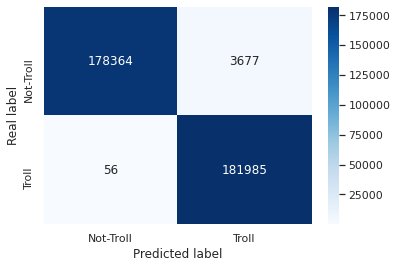

In [ ]:
class_labels = ["Not-Troll", "Troll"]
print("Accuracy:",accuracy_score(y_train, y_train_pred))
cm =  confusion_matrix(y_pred=y_train_pred, y_true=y_train, labels=[0,1])
plot_confusion_matrix(cm, class_labels)

In [ ]:
pd.Series(y_train).value_counts()

Accuracy: 0.9747545582047685


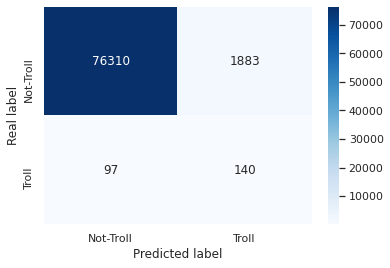

In [ ]:
X_test = vectorizer.transform(corpus_test)
y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
cm =  confusion_matrix(y_pred=y_pred, y_true=y_test, labels=[0,1])
plot_confusion_matrix(cm, class_labels)

In [ ]:
print(f'False discovery Rate = {}')


array([[76310,  1883],
       [   97,   140]])

## Grid Search

In [ ]:
t_sample = pd.read_csv('./Text Mining Project/DATA/text_sample.csv')

In [ ]:
corpus = t_sample.clean_tweet_text[t_sample.lang == 'es'].apply(preprocess)
y = t_sample[t_sample.lang == 'es'].is_troll

In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
# Pipeline & Gridsearch setup
# TFIDF pipeline setup
class_labels = ["Not-Troll", "Troll"]
min_df_ = [2,5,10,12,15,18,20]
max_df_ = [0.8,0.82, 0.85, 0.78, 0.75]
#for min_df_i in min_df_:
  #for max_df_j in max_df_:
vectorizer = TfidfVectorizer(min_df=min_df_[2],
                            max_df=max_df_[0],
                            stop_words=my_stopwords,
                            use_idf=True,
                            norm='l2')

X = vectorizer.fit_transform(corpus)
tvc_pipe = Pipeline([
                    ('STS', StandardScaler(with_mean=False)),
                    ('smote', SMOTE()),
                    ('lr', LogisticRegression()),
])

# Setting params for TFIDF Vectorizer gridsearch
tf_params = {
}

# Setting up GridSearch for TFIDFVectorizer
tvc_gs1 = GridSearchCV(tvc_pipe, param_grid=tf_params, cv = 5, verbose =1, n_jobs = 100)
tvc_gs1.fit(X, y)
y_pred = tvc_gs1.predict(X)

model_results(tvc_gs1, X, y, y_pred, class_labels)



KeyboardInterrupt: ignored

# Account Specific Features

# Text Specific Features

# All Accounts and Text Features

In [ ]:
at_sample = pd.read_csv('./Text Mining Project/DATA/at_sample.csv')
msk = np.random.rand(len(at_sample)) < 0.7
at_sample_train = at_sample[msk]
at_sample_test = at_sample[~msk]
cols = ['tweet_len', 'abbr_count', 'stopwords_count', 'hashtag_count',
       'mention_count', 'caps_to_normal', 'lang', 'follower_count',
       'following_count', 'tweet_client_name', 'like_count', 'retweet_count',
       'is_com_or_rt', 'num_in_name', 'follower_to_following']
       

In [ ]:
X_train = at_sample_train.dropna()[cols]
X_test = at_sample_test.dropna()[cols]
y_train = at_sample_train.dropna().is_troll
y_test = at_sample_test.dropna().is_troll

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.7MB/s 


In [ ]:
from category_encoders import TargetEncoder
cat_cols_names = ['lang', 'tweet_client_name']
encoder = TargetEncoder()
X_train[cat_cols_names] = encoder.fit_transform(X_train[cat_cols_names], y_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
X_test[cat_cols_names] = encoder.transform(X_test[cat_cols_names])

In [ ]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
oversample = SMOTE()
X_train, y_train  = oversample.fit_resample(X_train, y_train )
model = LogisticRegression().fit(X_train, y_train)
y_train_pred = model.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.9913876403671874


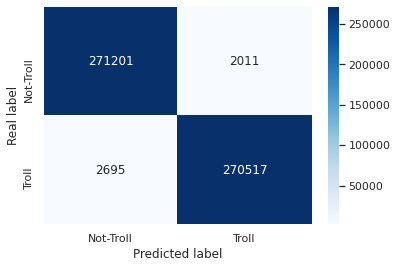

In [ ]:
class_labels = ["Not-Troll", "Troll"]
print("Accuracy:",accuracy_score(y_train, y_train_pred))
cm =  confusion_matrix(y_pred=y_train_pred, y_true=y_train, labels=[0,1])
plot_confusion_matrix(cm, class_labels)

Accuracy: 0.9914926786747018


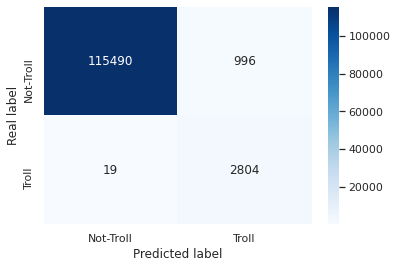

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
cm =  confusion_matrix(y_pred=y_pred, y_true=y_test, labels=[0,1])
plot_confusion_matrix(cm, class_labels)

# All Features